# **Obesity Study** - Professorship level analysis and Result

In [1]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: mount failed

In [2]:
cd /content/drive/MyDrive/Obesity

/content/drive/MyDrive/Obesity


In [3]:
pwd

'/content/drive/MyDrive/Obesity'

In [4]:
# Import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from io import StringIO

In [ ]:
!ls

AutogluonModels					  stunning_full_labels_performance_v2.png
Metabolomic_Cardiac_NOESY_Pronto.csv		  stunning_full_labels_performance_v2.tiff
model_performance.tiff				  X_test_data.csv
Obesity.ipynb					  X_train_data.csv
obesity_result_notebook.ipynb			  y_test.csv
result_whiteny.csv				  y_train.csv
shap_logistic_regression_feature_importance.tiff


In [ ]:
file_path = 'Metabolomic_Cardiac_NOESY_Pronto.csv'

# Load the CSV file with the correct delimiter
data = pd.read_csv(file_path, delimiter=';')

data.head()

,ppm,72,30,18,103,87,90,96,15,118,...,16,95,13,73,123,54,6,42,46,111
0,Classe,C,C,C,C,C,C,C,C,C,...,H,H,H,H,H,H,H,H,H,H
1,0.502934,1018.19,678.144,453.709,302.573,195.925,499.939,249.293,208.385,474.932,...,-26.546,269.925,272.731,268.174,358.061,422.541,251.824,190.764,534.245,46.2334
2,0.507935,1039.57,694.026,468.069,313.048,207.784,512.775,259.862,217.617,488.032,...,-17.4574,280.261,282.639,281.866,370.061,435.741,262.623,201.897,548.529,55.7041
3,0.512937,1087.79,711.03,483.094,324.481,223.603,534.835,277.171,227.707,501.84,...,-7.05183,292.083,293.346,303.172,384.052,457.211,274.103,214.533,564.414,66.3542
4,0.517938,1094.14,746.607,514.031,345.537,238.516,552.219,285.304,243.878,522.952,...,3.34169,311.861,309.375,316.801,398.274,471.556,290.211,233.712,593.265,78.6799


In [ ]:
# Create the new headers by concatenating the header with the first row
new_headers = [f'{a}-{b}' for a, b in zip(df.columns, df.iloc[0])]

# Extract the data excluding the first row
data = df.iloc[1:]

# Reset the index of the data
data.reset_index(drop=True, inplace=True)

data.columns = new_headers

data.head()

,ppm-Classe,72-C,30-C,18-C,103-C,87-C,90-C,96-C,15-C,118-C,...,16-H,95-H,13-H,73-H,123-H,54-H,6-H,42-H,46-H,111-H
0,0.502934,1018.19,678.144,453.709,302.573,195.925,499.939,249.293,208.385,474.932,...,-26.546,269.925,272.731,268.174,358.061,422.541,251.824,190.764,534.245,46.2334
1,0.507935,1039.57,694.026,468.069,313.048,207.784,512.775,259.862,217.617,488.032,...,-17.4574,280.261,282.639,281.866,370.061,435.741,262.623,201.897,548.529,55.7041
2,0.512937,1087.79,711.03,483.094,324.481,223.603,534.835,277.171,227.707,501.84,...,-7.05183,292.083,293.346,303.172,384.052,457.211,274.103,214.533,564.414,66.3542
3,0.517938,1094.14,746.607,514.031,345.537,238.516,552.219,285.304,243.878,522.952,...,3.34169,311.861,309.375,316.801,398.274,471.556,290.211,233.712,593.265,78.6799
4,0.52294,1107.68,754.423,517.774,353.017,247.099,556.777,296.431,252.871,542.852,...,13.9498,320.269,320.588,328.983,424.995,480.028,301.598,245.645,605.508,90.4899


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1533 entries, 0 to 1532
Data columns (total 73 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ppm-Classe  1533 non-null   object
 1   72-C        1533 non-null   object
 2   30-C        1533 non-null   object
 3   18-C        1533 non-null   object
 4   103-C       1533 non-null   object
 5   87-C        1533 non-null   object
 6   90-C        1533 non-null   object
 7   96-C        1533 non-null   object
 8   15-C        1533 non-null   object
 9   118-C       1533 non-null   object
 10  134-C       1533 non-null   object
 11  93-C        1533 non-null   object
 12  7-C         1533 non-null   object
 13  151-C       1533 non-null   object
 14  5-C         1533 non-null   object
 15  28-C        1533 non-null   object
 16  122-C       1533 non-null   object
 17  51-C        1533 non-null   object
 18  64-C        1533 non-null   object
 19  41-C        1533 non-null   object
 20  127-C   

In [ ]:
for col in data.columns:
  data[col] = pd.to_numeric(data[col], errors='coerce')

<ipython-input-30-4c4ad30c3211>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = pd.to_numeric(data[col], errors='coerce')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1533 entries, 0 to 1532
Data columns (total 73 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ppm-Classe  1533 non-null   float64
 1   72-C        1533 non-null   float64
 2   30-C        1533 non-null   float64
 3   18-C        1533 non-null   float64
 4   103-C       1533 non-null   float64
 5   87-C        1533 non-null   float64
 6   90-C        1533 non-null   float64
 7   96-C        1533 non-null   float64
 8   15-C        1533 non-null   float64
 9   118-C       1533 non-null   float64
 10  134-C       1533 non-null   float64
 11  93-C        1533 non-null   float64
 12  7-C         1533 non-null   float64
 13  151-C       1533 non-null   float64
 14  5-C         1533 non-null   float64
 15  28-C        1533 non-null   float64
 16  122-C       1533 non-null   float64
 17  51-C        1533 non-null   float64
 18  64-C        1533 non-null   float64
 19  41-C        1533 non-null  

In [ ]:
data.head()

,ppm-Classe,72-C,30-C,18-C,103-C,87-C,90-C,96-C,15-C,118-C,...,16-H,95-H,13-H,73-H,123-H,54-H,6-H,42-H,46-H,111-H
0,0.502934,1018.19,678.144,453.709,302.573,195.925,499.939,249.293,208.385,474.932,...,-26.54600,269.925,272.731,268.174,358.061,422.541,251.824,190.764,534.245,46.2334
1,0.507935,1039.57,694.026,468.069,313.048,207.784,512.775,259.862,217.617,488.032,...,-17.45740,280.261,282.639,281.866,370.061,435.741,262.623,201.897,548.529,55.7041
2,0.512937,1087.79,711.030,483.094,324.481,223.603,534.835,277.171,227.707,501.840,...,-7.05183,292.083,293.346,303.172,384.052,457.211,274.103,214.533,564.414,66.3542
3,0.517938,1094.14,746.607,514.031,345.537,238.516,552.219,285.304,243.878,522.952,...,3.34169,311.861,309.375,316.801,398.274,471.556,290.211,233.712,593.265,78.6799
4,0.522940,1107.68,754.423,517.774,353.017,247.099,556.777,296.431,252.871,542.852,...,13.94980,320.269,320.588,328.983,424.995,480.028,301.598,245.645,605.508,90.4899


In [ ]:
chemical_shifts = data.iloc[:, 0]  # First column
intensity_matrix = data.iloc[:, 1:]  # Remaining columns

In [ ]:
# Normalize each spectrum to a constant sum (e.g., 1 or 1000)
normalized_matrix = intensity_matrix.div(intensity_matrix.sum(axis=0), axis=1) * 1000

In [ ]:
# Combine chemical shifts with normalized data
normalized_data = pd.concat([chemical_shifts, normalized_matrix], axis=1)

# Save the normalized data to a new CSV file
normalized_data.to_csv("normalized_data.csv", index=False)

normalized_data.head()

,ppm-Classe,72-C,30-C,18-C,103-C,87-C,90-C,96-C,15-C,118-C,...,16-H,95-H,13-H,73-H,123-H,54-H,6-H,42-H,46-H,111-H
0,0.502934,0.479455,0.398880,0.314128,0.241941,0.169803,0.295906,0.182341,0.230490,0.278787,...,-0.042171,0.246801,0.278116,0.233775,0.272481,0.312227,0.218230,0.170287,0.340995,0.046520
1,0.507935,0.489523,0.408221,0.324070,0.250316,0.180081,0.303504,0.190072,0.240702,0.286477,...,-0.027733,0.256252,0.288219,0.245710,0.281613,0.321981,0.227589,0.180225,0.350112,0.056050
2,0.512937,0.512229,0.418223,0.334473,0.259458,0.193791,0.316561,0.202732,0.251862,0.294582,...,-0.011202,0.267061,0.299138,0.264283,0.292260,0.337846,0.237537,0.191505,0.360251,0.066766
3,0.517938,0.515219,0.439149,0.355893,0.276295,0.206716,0.326850,0.208681,0.269748,0.306975,...,0.005309,0.285144,0.315483,0.276164,0.303082,0.348446,0.251496,0.208625,0.378666,0.079168
4,0.522940,0.521595,0.443746,0.358484,0.282276,0.214155,0.329548,0.216820,0.279695,0.318657,...,0.022161,0.292832,0.326918,0.286783,0.323417,0.354706,0.261364,0.219277,0.386481,0.091051


## Let's Bring in Our R-Statistics below

In [ ]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
%%R
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
%%R

if (!require("BiocManager", quietly = TRUE))
  install.packages("BiocManager")

BiocManager::install("ASICS", force = TRUE)


library(ASICS)

normalized_data <- read.csv("normalized_data.csv")

# version 2 from here

# Set row names to the ppm values
rownames(normalized_data) <- normalized_data[, 1]

# Remove the ppm column
spectra_data <- normalized_data[, -1]

# Ensure the data is in the correct format
spectra_data <- as.data.frame(spectra_data)

library(ASICS)

# Create the Spectra object
spectra_object <- createSpectra(spectra_data)

# Perform metabolite quantification
asics_result <- ASICS(spectra_object)

# View the quantification results
print(getQuantification(asics_result))

# Save the results to a CSV file
write.csv(getQuantification(asics_result), "metabolites_quantification.csv")





'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com









	‘/tmp/RtmpCCUKQ7/downloaded_packages’




Update all/some/none? [a/s/n]: 







	‘/tmp/RtmpCCUKQ7/downloaded_packages’



Remove areas from spectrum and library 
  |======================================================================| 100%

Compute weights 
  |======================================================================| 100%

Remove metabolites that cannot belong to the mixture 
  |======================================================================| 100%

Translate library 
Compute shifts for all maximum shift values 
  |======================================================================| 100%

  |======================================================================| 100%

  |======================================================================| 100%

Put the median shift for extreme shift values 
  |======================================================================| 100%

  |======================================================================| 100%

  |======================================================================| 100%

Compute correlations between buckets and quantifi

### Metabolomics Analysis


In [ ]:
%%R

# install.packages("corrplot")

if (!require("BiocManager", quietly = TRUE))
  install.packages("BiocManager")

BiocManager::install("mixOmics", force = TRUE)


'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com




































	‘/tmp/RtmpMsrP0g/downloaded_packages’




Update all/some/none? [a/s/n]: a


















	‘/tmp/RtmpMsrP0g/downloaded_packages’



In [ ]:
%%R


# Load necessary libraries
library(ggplot2)
library(corrplot)
library(mixOmics)
library(dplyr)

# Load the metabolite quantification data
metabolite_data <- read.csv("metabolites_quantification.csv")
head(metabolite_data)



Attaching package: ‘MASS’



    select



Loaded mixOmics 6.30.0
Thank you for using mixOmics!
Tutorials: http://mixomics.org
Bookdown vignette: https://mixomicsteam.github.io/Bookdown
Questions, issues: Follow the prompts at http://mixomics.org/contact-us
Cite us:  citation('mixOmics')


Attaching package: ‘mixOmics’



    map




                       X      X72.C       X30.C       X18.C      X103.C
1      MethylmalonicAcid 0.01401532 0.010635443 0.009501551 0.008991454
2              L-Proline 0.01369532 0.013275275 0.012978185 0.011399010
3 Saturated_fattty_acids 0.01081429 0.008547753 0.007726116 0.007410319
4               D-Fucose 0.01031443 0.008971738 0.000000000 0.000000000
5       EthylmalonicAcid 0.01028364 0.011188042 0.011850542 0.010993710
6            L-Threonine 0.01015047 0.009974586 0.010508512 0.013408490
       X87.C       X90.C       X96.C       X15.C      X118.C      X134.C
1 0.00821672 0.009283209 0.007432884 0.009327745 0.009867253 0.008126277
2 0.00000000 0.012877810 0.013257256 0.014536929 0.012549120 0.014210004
3 0.00693508 0.009464476 0.007594498 0.006676351 0.010011848 0.007631067
4 0.00000000 0.009721081 0.000000000 0.000000000 0.009069596 0.008432052
5 0.01212432 0.010624156 0.011646295 0.013381622 0.009614091 0.011064874
6 0.01264283 0.013314586 0.010818010 0.009945946 0.0175831

In [ ]:
%%R

# Load necessary libraries
library(dplyr)
library(tidyr)
library(ggplot2)
library(corrplot)

# Load data
data <- read.csv("metabolites_quantification.csv")

# Rename the first column
colnames(data)[1] <- "Metabolite"

# Verify column names
colnames(data)

 [1] "Metabolite" "X72.C"      "X30.C"      "X18.C"      "X103.C"    
 [6] "X87.C"      "X90.C"      "X96.C"      "X15.C"      "X118.C"    
[11] "X134.C"     "X93.C"      "X7.C"       "X151.C"     "X5.C"      
[16] "X28.C"      "X122.C"     "X51.C"      "X64.C"      "X41.C"     
[21] "X127.C"     "X113.C"     "X128.C"     "X89.C"      "X120.C"    
[26] "X98.C"      "X58.C"      "X110.C"     "X126.C"     "X59.C"     
[31] "X148.C"     "X36.C"      "X34.C"      "X79.C"      "X48.C"     
[36] "X22.C"      "X85.C"      "X67.H"      "X44.H"      "X24.H"     
[41] "X115.H"     "X53.H"      "X101.H"     "X119.H"     "X104.H"    
[46] "X86.H"      "X47.H"      "X27.H"      "X39.H"      "X40.H"     
[51] "X135.H"     "X32.H"      "X31.H"      "X10.H"      "X19.H"     
[56] "X147.H"     "X99.H"      "X33.H"      "X76.H"      "X75.H"     
[61] "X132.H"     "X70.H"      "X43.H"      "X16.H"      "X95.H"     
[66] "X13.H"      "X73.H"      "X123.H"     "X54.H"      "X6.H"      
[71] "X42.H"      "X

In [ ]:
%%R

library(tidyr)
library(dplyr)

# Reshape the data into a tidy format
data_tidy <- data %>%
  pivot_longer(cols = -Metabolite, names_to = "SampleGroup", values_to = "Intensity") %>%
  mutate(
    Sample = sub("\\.C|\\.H", "", SampleGroup),  # Extract sample ID
    Group = ifelse(grepl("\\.C", SampleGroup), "BMI >= 30 kg/m²", "BMI < 30 kg/m²")  # Assign groups
  )

# Verify the tidy data
head(data_tidy)


# A tibble: 6 × 5
  Metabolite        SampleGroup Intensity Sample Group          
  <chr>             <chr>           <dbl> <chr>  <chr>          
1 MethylmalonicAcid X72.C         0.0140  X72    BMI >= 30 kg/m²
2 MethylmalonicAcid X30.C         0.0106  X30    BMI >= 30 kg/m²
3 MethylmalonicAcid X18.C         0.00950 X18    BMI >= 30 kg/m²
4 MethylmalonicAcid X103.C        0.00899 X103   BMI >= 30 kg/m²
5 MethylmalonicAcid X87.C         0.00822 X87    BMI >= 30 kg/m²
6 MethylmalonicAcid X90.C         0.00928 X90    BMI >= 30 kg/m²


In [ ]:
%%R

# Check for missing values
sum(is.na(data_tidy))

# Optionally, remove rows with missing values
data_tidy <- data_tidy %>% drop_na()



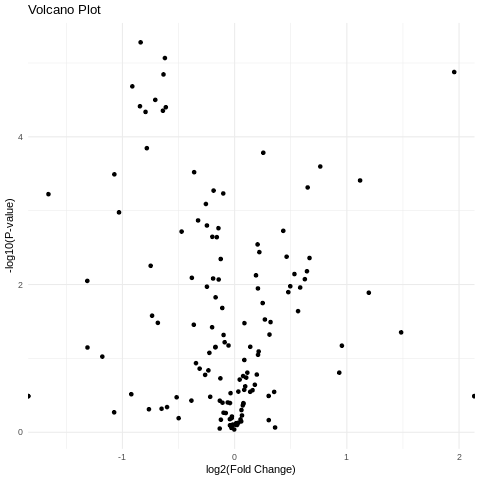

In [ ]:
%%R

# Calculate statistics
volcano_data <- data_tidy %>%
  group_by(Metabolite, Group) %>%
  summarize(mean_intensity = mean(Intensity, na.rm = TRUE), .groups = "drop") %>%
  pivot_wider(names_from = Group, values_from = mean_intensity) %>%
  mutate(
    log2FC = log2(`BMI >= 30 kg/m²` / `BMI < 30 kg/m²`),
    p_value = sapply(Metabolite, function(met) {
      t.test(Intensity ~ Group, data = data_tidy[data_tidy$Metabolite == met, ])$p.value
    }),
    negLogP = -log10(p_value)
  )

# Plot volcano plot
ggplot(volcano_data, aes(x = log2FC, y = negLogP)) +
  geom_point() +
  theme_minimal() +
  labs(x = "log2(Fold Change)", y = "-log10(P-value)", title = "Volcano Plot")


### Phase 2

In [ ]:
%%R
# Load data
data <- read.csv("metabolites_quantification.csv")

# Rename the first column to "Metabolite"
colnames(data)[1] <- "Metabolite"

# Verify column names
colnames(data)


 [1] "Metabolite" "X72.C"      "X30.C"      "X18.C"      "X103.C"    
 [6] "X87.C"      "X90.C"      "X96.C"      "X15.C"      "X118.C"    
[11] "X134.C"     "X93.C"      "X7.C"       "X151.C"     "X5.C"      
[16] "X28.C"      "X122.C"     "X51.C"      "X64.C"      "X41.C"     
[21] "X127.C"     "X113.C"     "X128.C"     "X89.C"      "X120.C"    
[26] "X98.C"      "X58.C"      "X110.C"     "X126.C"     "X59.C"     
[31] "X148.C"     "X36.C"      "X34.C"      "X79.C"      "X48.C"     
[36] "X22.C"      "X85.C"      "X67.H"      "X44.H"      "X24.H"     
[41] "X115.H"     "X53.H"      "X101.H"     "X119.H"     "X104.H"    
[46] "X86.H"      "X47.H"      "X27.H"      "X39.H"      "X40.H"     
[51] "X135.H"     "X32.H"      "X31.H"      "X10.H"      "X19.H"     
[56] "X147.H"     "X99.H"      "X33.H"      "X76.H"      "X75.H"     
[61] "X132.H"     "X70.H"      "X43.H"      "X16.H"      "X95.H"     
[66] "X13.H"      "X73.H"      "X123.H"     "X54.H"      "X6.H"      
[71] "X42.H"      "X

In [ ]:
%%R

# Load dplyr
library(dplyr)

# Select columns for BMI >= 30 kg/m² (C) and BMI < 30 kg/m² (H)
data_C <- dplyr::select(data, Metabolite, ends_with(".C"))
data_H <- dplyr::select(data, Metabolite, ends_with(".H"))



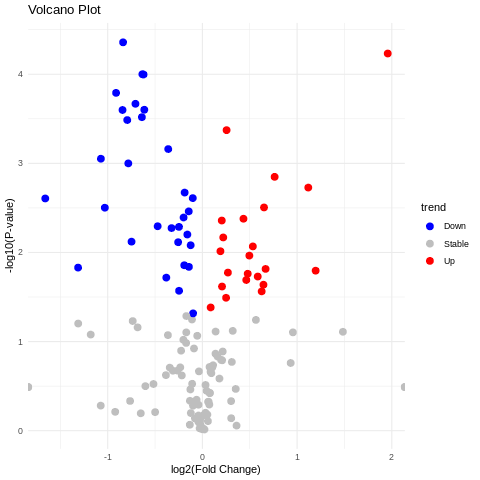

In [ ]:
%%R

# Calculate means, fold change (log2FC), and p-values
volcano_data <- data.frame(
  Metabolite = data$Metabolite,
  log2FC = log2(rowMeans(data_C[,-1], na.rm = TRUE) / rowMeans(data_H[,-1], na.rm = TRUE)), # Exclude "Metabolite" column
  p_value = apply(data[,-1], 1, function(row) {
    t.test(as.numeric(row[grep("\\.C", colnames(data))]),
           as.numeric(row[grep("\\.H", colnames(data))]))$p.value
  })
)

# Add -log10(p-value) and trend
volcano_data <- volcano_data %>%
  mutate(
    negLogP = -log10(p_value),
    trend = case_when(
      p_value < 0.05 & log2FC > 0 ~ "Up",
      p_value < 0.05 & log2FC < 0 ~ "Down",
      TRUE ~ "Stable"
    )
  )

# Plot volcano plot
ggplot(volcano_data, aes(x = log2FC, y = negLogP, color = trend)) +
  geom_point(size = 3) +
  theme_minimal() +
  labs(x = "log2(Fold Change)", y = "-log10(P-value)", title = "Volcano Plot") +
  scale_color_manual(values = c("Down" = "blue", "Stable" = "grey", "Up" = "red"))


In [ ]:
%%R

library(ggplot2)
library(ggrepel)

# Add top metabolites based on significance (negLogP) and fold change
top_metabolites <- volcano_data %>%
  filter(trend != "Stable") %>%
  arrange(desc(negLogP)) %>%
  group_by(trend) %>%
  slice_head(n = 5)  # Select top 5 metabolites for "Up" and "Down"

# Plot volcano plot with improved aesthetics
volcano_plot <- ggplot(volcano_data, aes(x = log2FC, y = negLogP, color = trend)) +
  geom_point(size = 8, alpha = 0.8) +  # Larger circles with higher transparency- 5 previously
  geom_text_repel(data = top_metabolites,
                  aes(label = Metabolite),
                  size = 8,  # Larger text size for better readability
                  box.padding = 0.4,
                  max.overlaps = 10) +  # Add labels for top metabolites
  geom_vline(xintercept = c(-1, 1), linetype = "dashed", color = "black", size = 1) +  # Add fold change lines
  geom_hline(yintercept = -log10(0.05), linetype = "dotted", color = "red", size = 1) +  # Add p-value threshold
  theme_minimal(base_size = 16) +  # Larger base text size for professional appearance
  labs(
    x = "log2(Fold Change)",
    y = "-log10(P-value)",
  ) +
  scale_color_manual(
    values = c("Down" = "blue", "Stable" = "grey", "Up" = "red"),
    labels = c("Downregulated", "Stable", "Upregulated")
  ) +
  theme(
    legend.position = "top",
    legend.title = element_blank(),
    legend.text = element_text(size = 16),
    panel.grid.major = element_line(size = 0.5, linetype = 'dotted', color = "grey"),
    axis.title = element_text(size = 18, face = "bold"),
    axis.text = element_text(size = 18),
    plot.title = element_text(size = 22, face = "bold"),
    plot.subtitle = element_text(size = 16, face = "italic")
  )

# Save the plot at 600 DPI
ggsave("enhanced_volcano_plot.png", plot = volcano_plot, dpi = 600, width = 12, height = 10)


In [ ]:
%%R

library(ggplot2)
library(ggrepel)

# Add top metabolites based on significance (negLogP) and fold change
top_metabolites <- volcano_data %>%
  filter(trend != "Stable") %>%
  arrange(desc(negLogP)) %>%
  group_by(trend) %>%
  slice_head(n = 5)  # Select top 5 metabolites for "Up" and "Down"

# Plot volcano plot with improved aesthetics
volcano_plot <- ggplot(volcano_data, aes(x = log2FC, y = negLogP, color = trend)) +
  geom_point(size = 8, alpha = 0.8) +  # Larger circles with higher transparency
  geom_text_repel(data = top_metabolites,
                  aes(label = Metabolite),
                  size = 8,  # Larger text size for better readability
                  box.padding = 0.4,
                  max.overlaps = 10) +  # Add labels for top metabolites
  geom_vline(xintercept = 0, linetype = "dashed", color = "black", size = 1) +  # Add vertical line at zero
 # geom_vline(xintercept = c(-1, 1), linetype = "dashed", color = "black", size = 1) +  # Add fold change lines
  geom_hline(yintercept = -log10(0.05), linetype = "dotted", color = "red", size = 1) +  # Add p-value threshold
  theme_minimal(base_size = 16) +  # Larger base text size for professional appearance
  labs(
    x = "log2(Fold Change)",
    y = "-log10(P-value)"
  ) +
  scale_color_manual(
    values = c("Down" = "blue", "Stable" = "grey", "Up" = "red"),
    labels = c("Downregulated", "Stable", "Upregulated")
  ) +
  theme(
    legend.position = "top",
    legend.title = element_blank(),
    legend.text = element_text(size = 16),
    panel.grid.major = element_line(size = 0.7, linetype = 'dotted', color = "grey50"),  # Darker grid lines
    panel.border = element_rect(color = "black", fill = NA, size = 1.5),  # Add border around plot area
    axis.title = element_text(size = 20, face = "bold"),
    axis.text = element_text(size = 18),
    plot.title = element_text(size = 22, face = "bold"),
    plot.subtitle = element_text(size = 16, face = "italic")
  )

# Save the plot at 600 DPI
ggsave("final_volcano_plot.png", plot = volcano_plot, dpi = 600, width = 12, height = 10)


## STATISTICAL summary of significant metabolites

In [ ]:
%%R

library(dplyr)

# Calculate statistics for all metabolites
metabolite_stats <- data %>%
  mutate(
    Mean_C = rowMeans(dplyr::select(., ends_with(".C")), na.rm = TRUE),
    SD_C = apply(dplyr::select(., ends_with(".C")), 1, sd, na.rm = TRUE),
    Mean_H = rowMeans(dplyr::select(., ends_with(".H")), na.rm = TRUE),
    SD_H = apply(dplyr::select(., ends_with(".H")), 1, sd, na.rm = TRUE),
    FC = Mean_C / Mean_H,
    log2FC = log2(FC),
    p_value = apply(.[,-1], 1, function(row) {
      t.test(as.numeric(row[grep("\\.C", colnames(data))]),
             as.numeric(row[grep("\\.H", colnames(data))]))$p.value
    })
  ) %>%
  mutate(
    negLogP = -log10(p_value),
    P_adj = p.adjust(p_value, method = "BH"),  # Adjust for multiple testing
    trend = case_when(
      p_value < 0.05 & log2FC > 0 ~ "Up",
      p_value < 0.05 & log2FC < 0 ~ "Down",
      TRUE ~ "Stable"
    )
  )

# Filter only significant metabolites (P_adj < 0.05)
significant_metabolites <- metabolite_stats %>%
  filter(P_adj < 0.05) %>%
  dplyr::select(
    Metabolite,
    Mean_C, SD_C,
    Mean_H, SD_H,
    trend,
    FC,
    log2FC,
    p_value,
    P_adj
  )

# Save the filtered table
write.csv(significant_metabolites, "significant_metabolites_differential.csv", row.names = FALSE)


### Lets create file for Metaboanalyst

In [ ]:
%%R

library(dplyr)

# Load data
quant_data <- read.csv("metabolites_quantification.csv", header = TRUE)
significant_data <- read.csv("significant_metabolites_differential.csv", header = TRUE)

# Fix missing column name for metabolites
colnames(quant_data)[1] <- "Metabolite"

# Filter rows in quant_data based on significant metabolites
filtered_data <- quant_data %>%
  filter(Metabolite %in% significant_data$Metabolite)

# Add a row indicating groups
group_row <- c(
  "Group",
  rep("BMI ≥ 30 kg/m²", sum(grepl("\\.C$", colnames(filtered_data)))),
  rep("BMI < 30 kg/m²", sum(grepl("\\.H$", colnames(filtered_data))))
)

# Combine the group row and filtered data
final_matrix <- rbind(group_row, filtered_data)

# Save the formatted matrix
write.csv(final_matrix, "filtered_matrix_metaboanalyst_file.csv", row.names = FALSE)


### Check if they are all blood metabolites



In [ ]:
import pandas as pd

# Load the metabolites quantification data
quant_data = pd.read_csv("metabolites_quantification.csv")

# Load the HMDB blood metabolites data
hmdb_data = pd.read_csv("metabolites-2024-12-08.csv")

# Extract the list of metabolite names from both datasets
quant_metabolites = quant_data.iloc[:, 0].str.strip()  # Metabolite column from metabolites_quantification.csv
hmdb_metabolites = hmdb_data['NAME'].str.strip()  # Metabolite names from HMDB

# Find metabolites in quant_data that are not in the HMDB blood list
not_in_blood = quant_metabolites[~quant_metabolites.isin(hmdb_metabolites)]

# Save the list of metabolites not found in blood
not_in_blood_list = not_in_blood.tolist()

not_in_blood_list[:10], len(not_in_blood_list)  # Display the first 10 metabolites not found and their count


(['MethylmalonicAcid',
  'L-Proline',
  'Saturated_fattty_acids',
  'D-Fucose',
  'EthylmalonicAcid',
  'Lactate',
  'Beta-Alanine',
  '2-AminoAdipicAcid',
  '2-Oxoisovalerate',
  'L-Isoleucine'],
 99)

In [ ]:
pip install fuzzywuzzy

In [ ]:
from fuzzywuzzy import process

# Example: Fuzzy matching for one metabolite
matches = [process.extractOne(m, hmdb_metabolites) for m in quant_metabolites]

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


KeyboardInterrupt: 

In [ ]:
from fuzzywuzzy import process

# Set a similarity threshold
threshold = 90

# Perform fuzzy matching to find metabolites not in blood
not_in_blood = [
    m for m in quant_metabolites
    if not process.extractOne(m, hmdb_metabolites) or process.extractOne(m, hmdb_metabolites)[1] < threshold
]

# Convert to a DataFrame and save
not_in_blood_df = pd.DataFrame(not_in_blood, columns=["Metabolite_Not_in_Blood"])
output_path = "metabolites_not_in_blood_threshold_90.csv"
not_in_blood_df.to_csv(output_path, index=False)

not_in_blood_df.head()

,Metabolite_Not_in_Blood
0,Saturated_fattty_acids
1,D-Fucose
2,2-Oxoisovalerate
3,3-Hydroxybutyrate
4,L-Aspartate


## PCA

Lets do the PCA

In [ ]:
%%R
install.packages("factoextra")

(as ‘lib’ is unspecified)



















































































































































































	‘/tmp/RtmpMsrP0g/downloaded_packages’



In [ ]:
%%R

# Load necessary libraries
library(dplyr)
library(ggplot2)
library(factoextra)

# Ensure dplyr functions are explicitly used to avoid conflicts
# Prepare data for PCA
data_for_pca <- data %>%
  dplyr::select(-Metabolite) %>%  # Exclude the Metabolite column
  t()  # Transpose for PCA

# Ensure rownames are properly set
rownames(data_for_pca) <- data$Metabolite

# Perform PCA
pca_result <- prcomp(data_for_pca, scale. = TRUE)

# Visualize PCA using factoextra
fviz_pca_ind(
  pca_result,
  geom = "point",
  habillage = rep(c("BMI >= 30 kg/m²", "BMI < 30 kg/m²"), each = ncol(data_for_pca) / 2),
  addEllipses = TRUE,
  palette = c("red", "blue")
)



  length of 'dimnames' [1] not equal to array extent




Error in dimnames(x) <- dn : 
  length of 'dimnames' [1] not equal to array extent


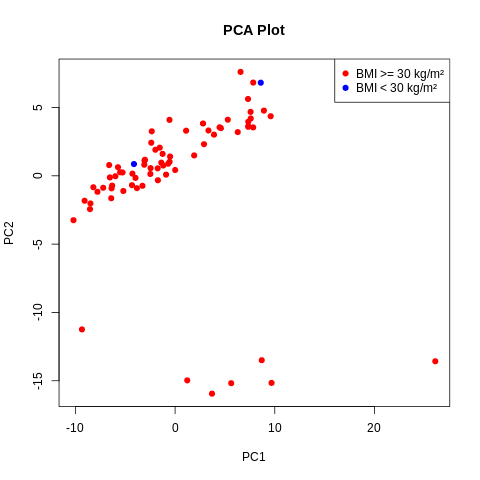

In [ ]:
%%R

# Perform PCA
pca_result <- prcomp(data_for_pca, scale. = TRUE)

# Plot PCA in base R
plot(pca_result$x[, 1], pca_result$x[, 2],
     col = rep(c("red", "blue"), each = ncol(data_for_pca) / 2),
     pch = 19,
     xlab = "PC1", ylab = "PC2", main = "PCA Plot")
legend("topright", legend = c("BMI >= 30 kg/m²", "BMI < 30 kg/m²"),
       col = c("red", "blue"), pch = 19)


In [ ]:
# Identify well-labeled (string) and no-label (numeric) entries
total_counts = len(data['ppm-Classe'])
well_labeled_counts = data['ppm-Classe'].apply(lambda x: isinstance(x, str)).sum()
no_label_counts = total_counts - well_labeled_counts

# Calculate percentages
well_labeled_percentage = (well_labeled_counts / total_counts) * 100
no_label_percentage = (no_label_counts / total_counts) * 100

# Display the results
results = {
    'Well Labeled (%)': round(well_labeled_percentage),
    'No Label (%)': round(no_label_percentage)
}

print(results)

{'Well Labeled (%)': 11, 'No Label (%)': 89}


In [ ]:
# Rename 'ppm-classe-label' to 'metabolite'
data = data.rename(columns={'ppm-Classe': 'metabolite'})
data


,metabolite,72-C,30-C,18-C,103-C,87-C,90-C,96-C,15-C,118-C,...,16-H,95-H,13-H,73-H,123-H,54-H,6-H,42-H,46-H,111-H
0,0.5,1018.19,678.144,453.709,302.573,195.925,499.939,249.293,208.385,474.932,...,-26.546,269.925,272.731,268.174,358.061,422.541,251.824,190.764,534.245,46.2334
1,0.51,1039.57,694.026,468.069,313.048,207.784,512.775,259.862,217.617,488.032,...,-17.4574,280.261,282.639,281.866,370.061,435.741,262.623,201.897,548.529,55.7041
2,0.51,1087.79,711.03,483.094,324.481,223.603,534.835,277.171,227.707,501.84,...,-7.05183,292.083,293.346,303.172,384.052,457.211,274.103,214.533,564.414,66.3542
3,0.52,1094.14,746.607,514.031,345.537,238.516,552.219,285.304,243.878,522.952,...,3.34169,311.861,309.375,316.801,398.274,471.556,290.211,233.712,593.265,78.6799
4,0.52,1107.68,754.423,517.774,353.017,247.099,556.777,296.431,252.871,542.852,...,13.9498,320.269,320.588,328.983,424.995,480.028,301.598,245.645,605.508,90.4899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1528,8.68,78.0432,85.1444,100.508,80.8817,119.734,67.2144,92.0951,86.7838,65.6872,...,145.684,127.955,74.8209,155.015,104.493,94.8604,102.871,159.812,82.3163,152.145
1529,8.68,77.7639,86.1743,100.052,80.8699,121.457,68.024,92.5201,87.8213,66.1748,...,147.13,127.799,76.9102,157.124,104.639,97.2758,105.696,162.351,83.514,150.879
1530,8.69,75.0865,83.3628,96.5841,81.9987,116.711,66.2078,89.7375,84.825,64.2615,...,142.427,128.367,73.8708,152.412,105.064,93.159,102.293,157.014,79.4778,154.672
1531,8.69,74.4369,82.3682,95.8063,79.4779,116.317,64.9604,88.4036,84.3534,63.2078,...,141.972,124.373,72.9847,151.342,102.272,92.3312,101.028,155.851,79.1023,149.502


In [ ]:
# Filter out rows where 'metabolite' contains integers or floats
data2 = data[data['metabolite'].apply(lambda x: isinstance(x, str))]

# Select only the labelled metabolite
# At this stage will eliminate all the chemical shifts that were not identified
# We focus only on the identified metabolites
data2


,metabolite,72-C,30-C,18-C,103-C,87-C,90-C,96-C,15-C,118-C,...,16-H,95-H,13-H,73-H,123-H,54-H,6-H,42-H,46-H,111-H
59,Lipids,3751.32,2867.37,2352.24,1786.68,1792.6,2253.31,1737.77,1540.15,2203.76,...,1217.56,1900.12,1613.9,2199.84,1985.07,2180.34,1739.25,1913.64,2462.86,1443.43
60,Lipids,3934.39,3135.54,2587.36,1875.03,1890.29,2351.73,1846.09,1703.98,2377.87,...,1364.2,2011.16,1744.4,2341.56,2127.37,2291.58,1893.19,2103.77,2678.42,1563.72
61,Lipids,4221.21,3348.42,2742.19,2022.92,2073.87,2537.23,2017.06,1868.57,2588.48,...,1491.39,2187.08,1888.05,2561.32,2400.81,2492.22,2060.91,2277.82,2875.92,1696.84
62,Lipids,4619.14,3682.54,3025.63,2245.19,2318.86,2778.43,2247.66,2097.85,2798.33,...,1694.35,2453.04,2062.12,2846.97,2608.53,2771.77,2255.08,2535.3,3145.46,1917.71
63,Lipids,5295.87,4149.05,3391.29,2534.82,2658.63,3120.95,2597.87,2411.28,3138.98,...,1968.21,2801.32,2332.95,3280.18,2964.71,3205.16,2534.47,2900.11,3542.44,2210.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1279,Phenylalanine,199.869,203.378,210.169,153.149,226.117,171.965,195.225,180.014,152.601,...,233.728,181.137,182.594,255.247,184.54,201.535,199.282,261.391,197.353,241.92
1310,Uracil,110.772,105.811,130.181,102.9,165.869,92.9032,117.839,134.185,87.9669,...,186.198,142.27,117.841,184.676,118.96,122.474,129.465,196.685,117.775,171.894
1311,Uracil,116.417,111.448,135.5,107.396,173.404,95.7796,122.155,135.212,98.1849,...,192.188,142.699,125.134,191.069,127.202,126.067,142.267,202.722,122.533,175.736
1484,Formate,169.114,170.174,184.264,145.051,204.979,136.769,166.68,159.705,131.511,...,233.31,191.27,151.322,244.012,178.069,172.825,179.886,251.125,164.772,236.479


In [ ]:
# Now at this stage, we want to use the metabolites as features for the analysis
data3 = data2.T
data3

,59,60,61,62,63,64,65,66,67,68,...,1248,1249,1260,1261,1278,1279,1310,1311,1484,1485
metabolite,Lipids,Lipids,Lipids,Lipids,Lipids,Lipids,Lipids,Lipids,Lipids,Lipids,...,Phenylalanine,Phenylalanine,Phenylalanine,Phenylalanine,Phenylalanine,Phenylalanine,Uracil,Uracil,Formate,Formate
72-C,3751.32,3934.39,4221.21,4619.14,5295.87,5906.31,6685.68,7578.6,8414.9,9359.34,...,311.596,309.168,271.929,251.678,200.73,199.869,110.772,116.417,169.114,179.225
30-C,2867.37,3135.54,3348.42,3682.54,4149.05,4817.86,5333.53,5901.39,6446.96,6874.26,...,288.019,282.452,256.482,235.127,203.037,203.378,105.811,111.448,170.174,178.308
18-C,2352.24,2587.36,2742.19,3025.63,3391.29,3922.13,4264.37,4697.56,5107.7,5463.95,...,284.684,282.107,257.796,241.483,211.073,210.169,130.181,135.5,184.264,191.23
103-C,1786.68,1875.03,2022.92,2245.19,2534.82,2952.25,3268.86,3594.08,3885.49,4103.41,...,219.59,215.706,205.172,202.971,158.773,153.149,102.9,107.396,145.051,159.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54-H,2180.34,2291.58,2492.22,2771.77,3205.16,3650.66,4103.02,4597.09,5015.08,5423.59,...,259.19,256.054,250.163,233.516,202.125,201.535,122.474,126.067,172.825,187.351
6-H,1739.25,1893.19,2060.91,2255.08,2534.47,2888.69,3181.36,3396,3623.27,3834.56,...,242.486,240.511,253.737,239.868,203.958,199.282,129.465,142.267,179.886,188.222
42-H,1913.64,2103.77,2277.82,2535.3,2900.11,3406.44,3814.12,4214.77,4596.05,4906.65,...,357.155,354.741,322.703,302.421,259.937,261.391,196.685,202.722,251.125,262.926
46-H,2462.86,2678.42,2875.92,3145.46,3542.44,4106.96,4592.96,5062.87,5529.14,5932.6,...,281.643,277.828,248.445,227.285,195.649,197.353,117.775,122.533,164.772,175.91


In [ ]:
# Set the first row as the new headers
data3.columns = data3.iloc[0]

# Drop the first row from the DataFrame inplace
data3.drop(data3.index[0], inplace=True)

# Display the modified DataFrame
data3


metabolite,Lipids,Lipids,Lipids,Lipids,Lipids,Lipids,Lipids,Lipids,Lipids,Lipids,...,Phenylalanine,Phenylalanine,Phenylalanine,Phenylalanine,Phenylalanine,Phenylalanine,Uracil,Uracil,Formate,Formate
72-C,3751.32,3934.39,4221.21,4619.14,5295.87,5906.31,6685.68,7578.6,8414.9,9359.34,...,311.596,309.168,271.929,251.678,200.73,199.869,110.772,116.417,169.114,179.225
30-C,2867.37,3135.54,3348.42,3682.54,4149.05,4817.86,5333.53,5901.39,6446.96,6874.26,...,288.019,282.452,256.482,235.127,203.037,203.378,105.811,111.448,170.174,178.308
18-C,2352.24,2587.36,2742.19,3025.63,3391.29,3922.13,4264.37,4697.56,5107.7,5463.95,...,284.684,282.107,257.796,241.483,211.073,210.169,130.181,135.5,184.264,191.23
103-C,1786.68,1875.03,2022.92,2245.19,2534.82,2952.25,3268.86,3594.08,3885.49,4103.41,...,219.59,215.706,205.172,202.971,158.773,153.149,102.9,107.396,145.051,159.714
87-C,1792.6,1890.29,2073.87,2318.86,2658.63,3006.62,3277.25,3577.28,3835.29,4103.63,...,306.384,303.876,282.074,267.259,226.308,226.117,165.869,173.404,204.979,219.049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54-H,2180.34,2291.58,2492.22,2771.77,3205.16,3650.66,4103.02,4597.09,5015.08,5423.59,...,259.19,256.054,250.163,233.516,202.125,201.535,122.474,126.067,172.825,187.351
6-H,1739.25,1893.19,2060.91,2255.08,2534.47,2888.69,3181.36,3396,3623.27,3834.56,...,242.486,240.511,253.737,239.868,203.958,199.282,129.465,142.267,179.886,188.222
42-H,1913.64,2103.77,2277.82,2535.3,2900.11,3406.44,3814.12,4214.77,4596.05,4906.65,...,357.155,354.741,322.703,302.421,259.937,261.391,196.685,202.722,251.125,262.926
46-H,2462.86,2678.42,2875.92,3145.46,3542.44,4106.96,4592.96,5062.87,5529.14,5932.6,...,281.643,277.828,248.445,227.285,195.649,197.353,117.775,122.533,164.772,175.91


In [ ]:
data3.columns

Index(['Lipids', 'Lipids', 'Lipids', 'Lipids', 'Lipids', 'Lipids', 'Lipids',
       'Lipids', 'Lipids', 'Lipids',
       ...
       'Phenylalanine', 'Phenylalanine', 'Phenylalanine', 'Phenylalanine',
       'Phenylalanine', 'Phenylalanine', 'Uracil', 'Uracil', 'Formate',
       'Formate'],
      dtype='object', name='metabolite', length=172)

In [ ]:
data3.columns.names

FrozenList(['metabolite'])

In [ ]:
data3.columns.names = [None]
data3 = data3.reset_index()
data3.rename(columns={'index': 'class'}, inplace=True)

data3

,class,Lipids,Lipids,Lipids,Lipids,Lipids,Lipids,Lipids,Lipids,Lipids,...,Phenylalanine,Phenylalanine,Phenylalanine,Phenylalanine,Phenylalanine,Phenylalanine,Uracil,Uracil,Formate,Formate
0,72-C,3751.32,3934.39,4221.21,4619.14,5295.87,5906.31,6685.68,7578.6,8414.9,...,311.596,309.168,271.929,251.678,200.73,199.869,110.772,116.417,169.114,179.225
1,30-C,2867.37,3135.54,3348.42,3682.54,4149.05,4817.86,5333.53,5901.39,6446.96,...,288.019,282.452,256.482,235.127,203.037,203.378,105.811,111.448,170.174,178.308
2,18-C,2352.24,2587.36,2742.19,3025.63,3391.29,3922.13,4264.37,4697.56,5107.7,...,284.684,282.107,257.796,241.483,211.073,210.169,130.181,135.5,184.264,191.23
3,103-C,1786.68,1875.03,2022.92,2245.19,2534.82,2952.25,3268.86,3594.08,3885.49,...,219.59,215.706,205.172,202.971,158.773,153.149,102.9,107.396,145.051,159.714
4,87-C,1792.6,1890.29,2073.87,2318.86,2658.63,3006.62,3277.25,3577.28,3835.29,...,306.384,303.876,282.074,267.259,226.308,226.117,165.869,173.404,204.979,219.049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,54-H,2180.34,2291.58,2492.22,2771.77,3205.16,3650.66,4103.02,4597.09,5015.08,...,259.19,256.054,250.163,233.516,202.125,201.535,122.474,126.067,172.825,187.351
68,6-H,1739.25,1893.19,2060.91,2255.08,2534.47,2888.69,3181.36,3396,3623.27,...,242.486,240.511,253.737,239.868,203.958,199.282,129.465,142.267,179.886,188.222
69,42-H,1913.64,2103.77,2277.82,2535.3,2900.11,3406.44,3814.12,4214.77,4596.05,...,357.155,354.741,322.703,302.421,259.937,261.391,196.685,202.722,251.125,262.926
70,46-H,2462.86,2678.42,2875.92,3145.46,3542.44,4106.96,4592.96,5062.87,5529.14,...,281.643,277.828,248.445,227.285,195.649,197.353,117.775,122.533,164.772,175.91


In [ ]:
data3.columns

Index(['class', 'Lipids', 'Lipids', 'Lipids', 'Lipids', 'Lipids', 'Lipids',
       'Lipids', 'Lipids', 'Lipids',
       ...
       'Phenylalanine', 'Phenylalanine', 'Phenylalanine', 'Phenylalanine',
       'Phenylalanine', 'Phenylalanine', 'Uracil', 'Uracil', 'Formate',
       'Formate'],
      dtype='object', length=173)

# **Feature Engineering**

## Initial

In [ ]:
data4 = data3.copy()
data4['class'] = data3['class'].apply(lambda x: 0 if '-H' in x else (1 if '-C' in x else None))

data4.head()


,class,Lipids,Lipids,Lipids,Lipids,Lipids,Lipids,Lipids,Lipids,Lipids,...,Phenylalanine,Phenylalanine,Phenylalanine,Phenylalanine,Phenylalanine,Phenylalanine,Uracil,Uracil,Formate,Formate
0,1,3751.32,3934.39,4221.21,4619.14,5295.87,5906.31,6685.68,7578.6,8414.9,...,311.596,309.168,271.929,251.678,200.73,199.869,110.772,116.417,169.114,179.225
1,1,2867.37,3135.54,3348.42,3682.54,4149.05,4817.86,5333.53,5901.39,6446.96,...,288.019,282.452,256.482,235.127,203.037,203.378,105.811,111.448,170.174,178.308
2,1,2352.24,2587.36,2742.19,3025.63,3391.29,3922.13,4264.37,4697.56,5107.7,...,284.684,282.107,257.796,241.483,211.073,210.169,130.181,135.5,184.264,191.23
3,1,1786.68,1875.03,2022.92,2245.19,2534.82,2952.25,3268.86,3594.08,3885.49,...,219.59,215.706,205.172,202.971,158.773,153.149,102.9,107.396,145.051,159.714
4,1,1792.6,1890.29,2073.87,2318.86,2658.63,3006.62,3277.25,3577.28,3835.29,...,306.384,303.876,282.074,267.259,226.308,226.117,165.869,173.404,204.979,219.049


In [ ]:
data4.tail()

,class,Lipids,Lipids,Lipids,Lipids,Lipids,Lipids,Lipids,Lipids,Lipids,...,Phenylalanine,Phenylalanine,Phenylalanine,Phenylalanine,Phenylalanine,Phenylalanine,Uracil,Uracil,Formate,Formate
67,0,2180.34,2291.58,2492.22,2771.77,3205.16,3650.66,4103.02,4597.09,5015.08,...,259.19,256.054,250.163,233.516,202.125,201.535,122.474,126.067,172.825,187.351
68,0,1739.25,1893.19,2060.91,2255.08,2534.47,2888.69,3181.36,3396,3623.27,...,242.486,240.511,253.737,239.868,203.958,199.282,129.465,142.267,179.886,188.222
69,0,1913.64,2103.77,2277.82,2535.3,2900.11,3406.44,3814.12,4214.77,4596.05,...,357.155,354.741,322.703,302.421,259.937,261.391,196.685,202.722,251.125,262.926
70,0,2462.86,2678.42,2875.92,3145.46,3542.44,4106.96,4592.96,5062.87,5529.14,...,281.643,277.828,248.445,227.285,195.649,197.353,117.775,122.533,164.772,175.91
71,0,1443.43,1563.72,1696.84,1917.71,2210.78,2614.15,3037.86,3435.02,3884.69,...,289.204,284.644,280.359,276.877,245.642,241.92,171.894,175.736,236.479,251.417


## Intermediary

In [ ]:
data4.dtypes

,0
class,int64
Lipids,object
Lipids,object
Lipids,object
Lipids,object
...,...
Phenylalanine,object
Uracil,object
Uracil,object
Formate,object


In [ ]:
# Ensure all column names are unique
def make_column_names_unique(columns):
    unique_columns = []
    seen = {}
    for col in columns:
        if col in seen:
            seen[col] += 1
            unique_columns.append(f"{col}_{seen[col]}")
        else:
            seen[col] = 0
            unique_columns.append(col)
    return unique_columns

data4.columns = make_column_names_unique(data4.columns)

# Loop through all columns except 'class'
for col in data4.columns[1:]:
    # Check if the column data type is object
    if data4[col].dtype == 'object':
        try:
            # Convert the column to float, replacing non-convertible values with NaN
            data4[col] = pd.to_numeric(data4[col].apply(lambda x: str(x).strip()), errors='coerce')
        except Exception as e:
            print(f"Error converting column {col}: {e}")


data4.dtypes

,0
class,int64
Lipids,float64
Lipids_1,float64
Lipids_2,float64
Lipids_3,float64
...,...
Phenylalanine_11,float64
Uracil_2,float64
Uracil_3,float64
Formate,float64


In [ ]:
data4.head()

,class,Lipids,Lipids_1,Lipids_2,Lipids_3,Lipids_4,Lipids_5,Lipids_6,Lipids_7,Lipids_8,...,Phenylalanine_6,Phenylalanine_7,Phenylalanine_8,Phenylalanine_9,Phenylalanine_10,Phenylalanine_11,Uracil_2,Uracil_3,Formate,Formate_1
0,1,3751.32,3934.39,4221.21,4619.14,5295.87,5906.31,6685.68,7578.60,8414.90,...,311.596,309.168,271.929,251.678,200.730,199.869,110.772,116.417,169.114,179.225
1,1,2867.37,3135.54,3348.42,3682.54,4149.05,4817.86,5333.53,5901.39,6446.96,...,288.019,282.452,256.482,235.127,203.037,203.378,105.811,111.448,170.174,178.308
2,1,2352.24,2587.36,2742.19,3025.63,3391.29,3922.13,4264.37,4697.56,5107.70,...,284.684,282.107,257.796,241.483,211.073,210.169,130.181,135.500,184.264,191.230
3,1,1786.68,1875.03,2022.92,2245.19,2534.82,2952.25,3268.86,3594.08,3885.49,...,219.590,215.706,205.172,202.971,158.773,153.149,102.900,107.396,145.051,159.714
4,1,1792.60,1890.29,2073.87,2318.86,2658.63,3006.62,3277.25,3577.28,3835.29,...,306.384,303.876,282.074,267.259,226.308,226.117,165.869,173.404,204.979,219.049


In [ ]:
data4.shape

(72, 173)

In [ ]:
# Keep the 'sample' column with the features
X = data4.drop(columns=['class'], axis=1)
y = data4['class']


# Checking the shapes
X.shape, y.shape


((72, 172), (72,))

In [ ]:
# check if there missing data (this datasets do not show NAs
# as we will see in the empty list output)

[x for x in X.columns if X[x].isnull().sum() > 0]

[]

In [ ]:
X

,Lipids,Lipids_1,Lipids_2,Lipids_3,Lipids_4,Lipids_5,Lipids_6,Lipids_7,Lipids_8,Lipids_9,...,Phenylalanine_6,Phenylalanine_7,Phenylalanine_8,Phenylalanine_9,Phenylalanine_10,Phenylalanine_11,Uracil_2,Uracil_3,Formate,Formate_1
0,3751.32,3934.39,4221.21,4619.14,5295.87,5906.31,6685.68,7578.60,8414.90,9359.34,...,311.596,309.168,271.929,251.678,200.730,199.869,110.772,116.417,169.114,179.225
1,2867.37,3135.54,3348.42,3682.54,4149.05,4817.86,5333.53,5901.39,6446.96,6874.26,...,288.019,282.452,256.482,235.127,203.037,203.378,105.811,111.448,170.174,178.308
2,2352.24,2587.36,2742.19,3025.63,3391.29,3922.13,4264.37,4697.56,5107.70,5463.95,...,284.684,282.107,257.796,241.483,211.073,210.169,130.181,135.500,184.264,191.230
3,1786.68,1875.03,2022.92,2245.19,2534.82,2952.25,3268.86,3594.08,3885.49,4103.41,...,219.590,215.706,205.172,202.971,158.773,153.149,102.900,107.396,145.051,159.714
4,1792.60,1890.29,2073.87,2318.86,2658.63,3006.62,3277.25,3577.28,3835.29,4103.63,...,306.384,303.876,282.074,267.259,226.308,226.117,165.869,173.404,204.979,219.049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2180.34,2291.58,2492.22,2771.77,3205.16,3650.66,4103.02,4597.09,5015.08,5423.59,...,259.190,256.054,250.163,233.516,202.125,201.535,122.474,126.067,172.825,187.351
68,1739.25,1893.19,2060.91,2255.08,2534.47,2888.69,3181.36,3396.00,3623.27,3834.56,...,242.486,240.511,253.737,239.868,203.958,199.282,129.465,142.267,179.886,188.222
69,1913.64,2103.77,2277.82,2535.30,2900.11,3406.44,3814.12,4214.77,4596.05,4906.65,...,357.155,354.741,322.703,302.421,259.937,261.391,196.685,202.722,251.125,262.926
70,2462.86,2678.42,2875.92,3145.46,3542.44,4106.96,4592.96,5062.87,5529.14,5932.60,...,281.643,277.828,248.445,227.285,195.649,197.353,117.775,122.533,164.772,175.910


In [ ]:
X.dtypes.value_counts()

,count
float64,172


In [ ]:
# Checking for NaN values and non-integer values in the dataframe, excluding the first column
nan_check = X.isna().any().any()
non_float_check = X.applymap(lambda x: isinstance(x, float)).all().all()

nan_check, non_float_check

<ipython-input-33-24f015e36c1e>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  non_float_check = X.applymap(lambda x: isinstance(x, float)).all().all()


(False, True)

In [ ]:
[x for x in X.columns if X[x].isnull().sum() > 0]

[]

In [ ]:
y.value_counts()

,count
class,
1,36
0,36


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Splitting the data into 80% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.30, random_state=42)

# Normalizing the data using StandardScaler
scaler = StandardScaler()

# Fitting the scaler on the training data
X_train = scaler.fit_transform(X_train)

# Applying the scaler on the test data
X_test = scaler.transform(X_test)

print("Shapes of datasets:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)


Shapes of datasets:
X_train: (50, 172)
X_test: (22, 172)


In [ ]:
X_train

array([[ 1.45089503,  1.33369061,  1.3309891 , ..., -0.33313496,
         0.03846473,  0.1033385 ],
       [-0.92637266, -0.9323802 , -0.86086553, ...,  0.91004104,
         0.03644401, -0.1245472 ],
       [ 0.17780389,  0.10455834,  0.09337174, ..., -0.15563201,
        -0.18679412, -0.07661967],
       ...,
       [-1.60218584, -1.55034081, -1.67401362, ..., -1.19375935,
        -1.26215581, -1.48981755],
       [-0.28496944, -0.30694805, -0.21217925, ..., -0.26795042,
        -0.15345219, -0.23041696],
       [-0.59363337, -0.64772389, -0.66240717, ..., -0.12772309,
        -0.01707926,  0.05362263]])

# **Descrimination of the metabolites**

# **Result 1: Kruskal-Wallis test**

To perform a Kruskal-Wallis test across groups defined in y with independent variables in X, and then adjust the resulting p-values using the Benjamini-Hochberg False Discovery Rate (FDR) method.

Performing the Kruskal-Wallis test for each independent variable (metabolite) in X against the groups in y.
Applying the Benjamini-Hochberg procedure to the obtained p-values to calculate the q-values (adjusted p-values).
(Optional) Calculating the AUC (Area Under the ROC Curve) for each metabolite comparing HC (Healthy Control) with VTE and HC with APS, if the necessary data and labels are provided.

In [ ]:
X.columns

Index(['Lipids', 'Lipids_1', 'Lipids_2', 'Lipids_3', 'Lipids_4', 'Lipids_5',
       'Lipids_6', 'Lipids_7', 'Lipids_8', 'Lipids_9',
       ...
       'Phenylalanine_6', 'Phenylalanine_7', 'Phenylalanine_8',
       'Phenylalanine_9', 'Phenylalanine_10', 'Phenylalanine_11', 'Uracil_2',
       'Uracil_3', 'Formate', 'Formate_1'],
      dtype='object', length=172)

### Statistics on the entire dataset

Later- statistics on only the X_train

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from statsmodels.stats.multitest import multipletests
from sklearn.metrics import roc_auc_score

if isinstance(X_train, np.ndarray):
    X_train = pd.DataFrame(X_train, columns=X.columns)

y_series = pd.Series(y_train)
X_train = X_train.reset_index(drop=True)
y_series = y_series.reset_index(drop=True)

results = []

for metabolite in X_train.columns:
    samples_control = X_train.loc[y_series == 0, metabolite]
    samples_hepatoblastoma = X_train.loc[y_series == 1, metabolite]

    if samples_control.size > 0 and samples_hepatoblastoma.size > 0:
        mw_result = stats.mannwhitneyu(samples_control, samples_hepatoblastoma)
        p_value = mw_result.pvalue
    else:
        p_value = np.nan

    median_control = samples_control.median()
    median_hepatoblastoma = samples_hepatoblastoma.median()
    direction = "Increased" if median_hepatoblastoma > median_control else "Decreased"

    results.append((metabolite, direction, p_value))

results_df = pd.DataFrame(results, columns=['Metabolite', 'Direction', 'Raw p-Value'])

valid_p_values = results_df['Raw p-Value'].notna()
rejected, pvals_corrected, _, _ = multipletests(results_df.loc[valid_p_values, 'Raw p-Value'], alpha=0.05, method='fdr_bh')

results_df.loc[valid_p_values, 'q-Value'] = pvals_corrected

auc_scores = []

for metabolite in X_train.columns:
    labels = y_series.astype(int)

    if labels.nunique() > 1:
        auc_score = roc_auc_score(labels, X_train[metabolite])
        auc_scores.append(auc_score)
    else:
        auc_scores.append(np.nan)

results_df['AUC'] = auc_scores

results_df


,Metabolite,Direction,Raw p-Value,q-Value,AUC
0,Lipids,Increased,0.669479,0.742906,0.5360
1,Lipids_1,Decreased,0.726901,0.791310,0.5296
2,Lipids_2,Decreased,0.669479,0.742906,0.5360
3,Lipids_3,Decreased,0.800858,0.866337,0.5216
4,Lipids_4,Decreased,0.846154,0.898385,0.5168
...,...,...,...,...,...
167,Phenylalanine_11,Decreased,0.000132,0.008864,0.1840
168,Uracil_2,Decreased,0.000594,0.015678,0.2160
169,Uracil_3,Decreased,0.000227,0.009101,0.1952
170,Formate,Decreased,0.000265,0.009101,0.1984


In [ ]:
results_df.to_csv('result_whiteny.csv', index=False)

In [ ]:
import pandas as pd

results_df['Metabolite Group'] = results_df['Metabolite'].apply(lambda x: x.split('_')[0])

def select_best_metabolite(group):
    # Sort by Raw p-Value, q-Value, and AUC
    sorted_group = group.sort_values(by=['Raw p-Value', 'q-Value', 'AUC'], ascending=[True, True, False])
    # Return the first row (best one)
    return sorted_group.iloc[0]

best_metabolites_df = results_df.groupby('Metabolite Group').apply(select_best_metabolite).reset_index(drop=True)

best_metabolites_df


<ipython-input-41-5a47f85f25a6>:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best_metabolites_df = results_df.groupby('Metabolite Group').apply(select_best_metabolite).reset_index(drop=True)


,Metabolite,Direction,Raw p-Value,q-Value,AUC,Metabolite Group
0,Acetate_1,Increased,0.221564,0.346446,0.6016,Acetate
1,Alanine_2,Increased,0.016130,0.099086,0.6992,Alanine
2,Choline_3,Increased,0.019894,0.099797,0.6928,Choline
3,Citrate_3,Increased,0.065289,0.143972,0.6528,Citrate
4,Ethanol_2,Increased,0.034438,0.124273,0.6752,Ethanol
5,Formate_1,Decreased,0.000104,0.008864,0.1792,Formate
6,Glucose_6,Increased,0.013733,0.099086,0.7040,Glucose
7,Glutamate_5,Increased,0.032817,0.124273,0.6768,Glutamate
8,Glutamine_5,Increased,0.050032,0.134378,0.6624,Glutamine
9,Isoleucin_6,Increased,0.312999,0.456237,0.5840,Isoleucin


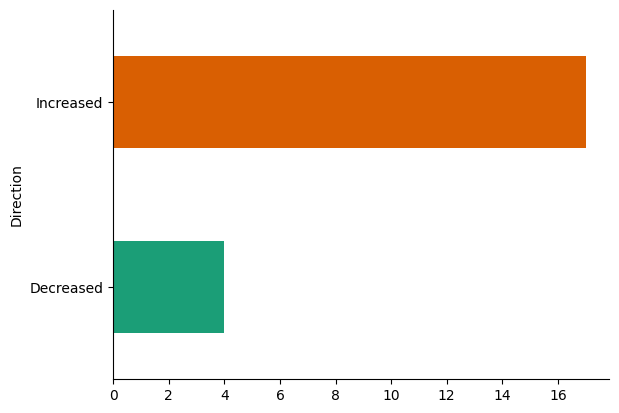

In [ ]:
# @title Direction

from matplotlib import pyplot as plt
import seaborn as sns
best_metabolites_df.groupby('Direction').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

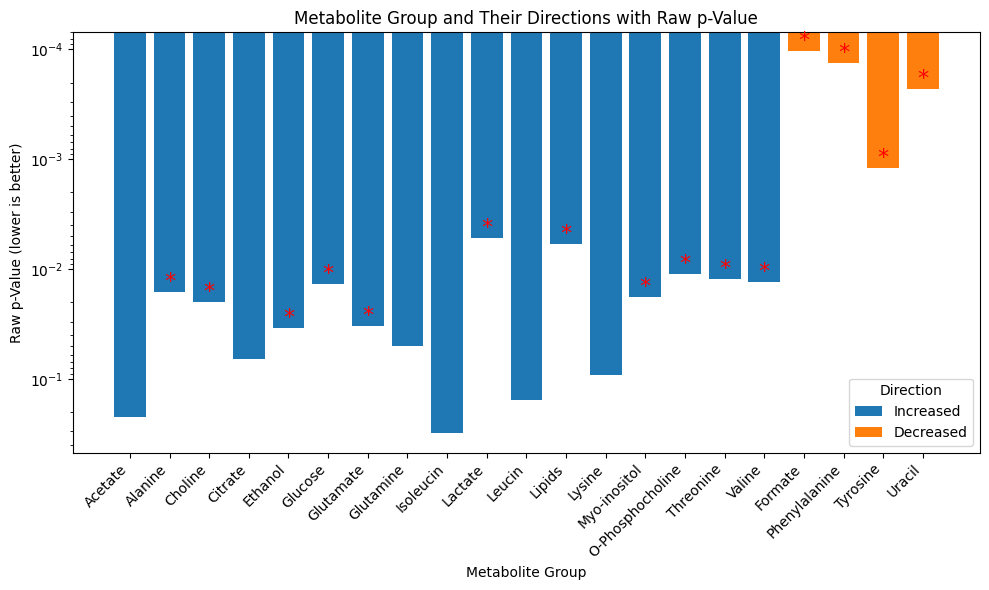

In [ ]:
plt.figure(figsize=(10, 6))

# Plotting bars and adding asterisks on top of bars where p-value < 0.05
for direction in best_metabolites_df['Direction'].unique():
    subset = best_metabolites_df[best_metabolites_df['Direction'] == direction]
    bars = plt.bar(subset['Metabolite Group'], subset['Raw p-Value'], label=direction)

    # Adding asterisks on top of bars where p-value < 0.05
    for bar, p_value in zip(bars, subset['Raw p-Value']):
        if p_value < 0.05:
            plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), '*',
                     ha='center', va='bottom', fontsize=16, color='red')

plt.title('Metabolite Group and Their Directions with Raw p-Value')
plt.xlabel('Metabolite Group')
plt.ylabel('Raw p-Value (lower is better)')
plt.xticks(rotation=45, ha='right')
plt.yscale('log')  # Using log scale to better visualize the differences in p-values
plt.gca().invert_yaxis()  # Inverting y-axis to reflect that lower p-values are better
plt.legend(title='Direction')
plt.tight_layout()
plt.show()

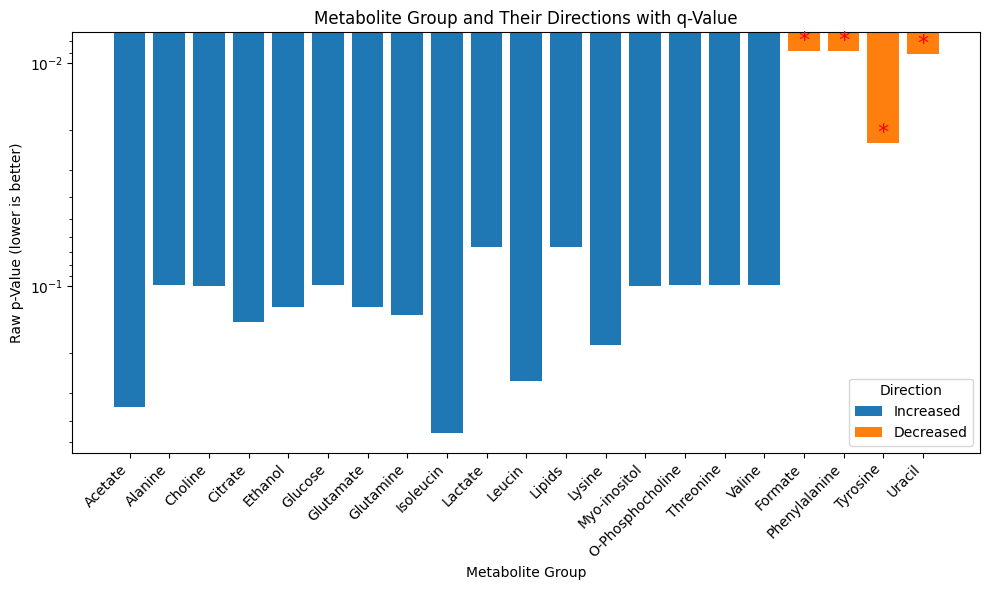

In [ ]:
plt.figure(figsize=(10, 6))

# Plotting bars and adding asterisks on top of bars where p-value < 0.05
for direction in best_metabolites_df['Direction'].unique():
    subset = best_metabolites_df[best_metabolites_df['Direction'] == direction]
    bars = plt.bar(subset['Metabolite Group'], subset['q-Value'], label=direction)

    # Adding asterisks on top of bars where p-value < 0.05
    for bar, p_value in zip(bars, subset['q-Value']):
        if p_value < 0.05:
            plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), '*',
                     ha='center', va='bottom', fontsize=16, color='red')

plt.title('Metabolite Group and Their Directions with q-Value')
plt.xlabel('Metabolite Group')
plt.ylabel('Raw p-Value (lower is better)')
plt.xticks(rotation=45, ha='right')
plt.yscale('log')  # Using log scale to better visualize the differences in p-values
plt.gca().invert_yaxis()  # Inverting y-axis to reflect that lower p-values are better
plt.legend(title='Direction')
plt.tight_layout()
plt.show()

In [ ]:
best_metabolites_df.Metabolite.to_list()

['Acetate_1',
 'Alanine_2',
 'Choline_3',
 'Citrate_3',
 'Ethanol_2',
 'Formate_1',
 'Glucose_6',
 'Glutamate_5',
 'Glutamine_5',
 'Isoleucin_6',
 'Lactate',
 'Leucin_4',
 'Lipids_49',
 'Lysine_4',
 'Myo-inositol_1',
 'O-Phosphocholine_4',
 'Phenylalanine_11',
 'Threonine_2',
 'Tyrosine_9',
 'Uracil_3',
 'Valine_4']

In [ ]:
import pandas as pd

selected_metabolites = ['Acetate_1',
 'Alanine_2',
 'Choline_3',
 'Citrate_3',
 'Ethanol_2',
 'Formate_1',
 'Glucose_6',
 'Glutamate_5',
 'Glutamine_5',
 'Isoleucin_6',
 'Lactate',
 'Leucin_4',
 'Lipids_49',
 'Lysine_4',
 'Myo-inositol_1',
 'O-Phosphocholine_4',
 'Phenylalanine_11',
 'Threonine_2',
 'Tyrosine_9',
 'Uracil_3',
 'Valine_4']

X_train_selected = X_train[selected_metabolites]
X_test = pd.DataFrame(X_test, columns=X_train.columns)
X_test_selected = X_test[selected_metabolites]


In [ ]:
X_train_selected.head()

,Acetate_1,Alanine_2,Choline_3,Citrate_3,Ethanol_2,Formate_1,Glucose_6,Glutamate_5,Glutamine_5,Isoleucin_6,...,Leucin_4,Lipids_49,Lysine_4,Myo-inositol_1,O-Phosphocholine_4,Phenylalanine_11,Threonine_2,Tyrosine_9,Uracil_3,Valine_4
0,1.122118,0.666872,0.844850,1.058527,0.919988,0.103338,0.991281,0.652026,0.852673,1.273126,...,0.580810,-0.020989,0.831083,0.059607,0.579629,-0.329555,0.636871,0.102788,-0.333135,0.183139
1,-0.411514,-0.473636,0.219692,-0.697304,-1.473844,-0.124547,-0.322092,-0.375994,-0.847687,-0.848206,...,-0.408756,-1.256327,-0.136029,-0.830293,-1.029546,0.566285,-1.082806,0.658701,0.910041,-0.706826
2,0.167510,-0.354012,-0.162241,0.632064,0.371990,-0.076620,-0.185733,0.164628,-0.109909,0.180626,...,-0.318584,-0.414860,0.203723,0.334832,0.191735,0.088304,0.299788,-0.160114,-0.155632,-0.269631
3,-1.462230,0.498468,-0.507965,-1.158197,0.512323,1.220821,0.042329,-1.121587,0.210226,-1.158347,...,0.881417,-0.552541,-1.518410,0.132888,-0.179567,0.830525,-0.375238,0.090663,0.999912,-0.703044
4,-1.045314,0.514747,0.069819,-0.703261,-0.132854,0.025086,0.368312,-0.848828,0.576727,-1.079242,...,0.895863,-0.283617,-0.871640,-0.363769,-0.871994,0.170053,-0.835660,-0.078090,0.312867,-0.931559


In [ ]:
X_test_selected.head()

,Acetate_1,Alanine_2,Choline_3,Citrate_3,Ethanol_2,Formate_1,Glucose_6,Glutamate_5,Glutamine_5,Isoleucin_6,...,Leucin_4,Lipids_49,Lysine_4,Myo-inositol_1,O-Phosphocholine_4,Phenylalanine_11,Threonine_2,Tyrosine_9,Uracil_3,Valine_4
0,-0.281275,-0.251184,-0.258394,-0.241634,-1.189474,-0.888220,-0.494522,0.629120,0.027989,-0.682093,...,-0.372538,-0.750826,0.139773,0.379059,-0.041066,-0.447847,-0.163961,-0.770011,-0.181111,-0.336995
1,-1.317359,-0.973673,-0.764683,-0.663972,-1.061013,0.344943,-0.544959,-1.831727,-1.446290,-0.823832,...,-0.271561,-0.586003,-1.343038,-1.177735,-1.187271,-0.489089,-1.318434,-0.189283,0.298557,-1.062665
2,-0.078870,-0.335019,-0.411075,0.327496,0.324565,-0.318327,-0.196367,0.518193,-0.048750,-0.438180,...,-0.588735,-0.739643,-0.161201,0.877052,0.311620,-0.145507,0.323273,-0.869268,-0.350612,-0.079195
3,0.107447,0.109463,0.328221,0.194603,-0.058171,-1.171263,0.241879,0.682948,-0.173733,0.529766,...,-0.074256,3.055201,0.208464,0.915556,0.943703,-1.296840,0.973323,-0.574939,-0.917040,2.954413
4,1.309469,0.331141,1.279208,0.466565,-0.024405,0.360400,0.198394,0.293331,0.326311,1.049278,...,0.254936,0.217383,0.812788,-0.576543,0.055553,0.141690,0.171696,0.682602,0.034105,0.213427


In [ ]:
X_train_selected.to_csv('X_train_data.csv', index=False)
X_test_selected.to_csv('X_test_data.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

# **Machine Learning**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, matthews_corrcoef, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier

# Define the models to be evaluated
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'Neural Network': MLPClassifier(max_iter=1000),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Initialize a list to store the results
results = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    y_prob = model.predict_proba(X_test_selected)[:, 1] if hasattr(model, "predict_proba") else None

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else np.nan

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Recall': recall,
        'Precision': precision,
        'MCC': mcc,
        'AUC': auc
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display the results
results_df


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:36:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


,Model,Accuracy,F1 Score,Recall,Precision,MCC,AUC
0,Logistic Regression,0.818182,0.833333,0.909091,0.769231,0.647150,0.826446
1,Random Forest,0.727273,0.700000,0.636364,0.777778,0.462250,0.747934
2,Gradient Boosting,0.590909,0.526316,0.454545,0.625000,0.188982,0.669421
3,Support Vector Machine,0.727273,0.727273,0.727273,0.727273,0.454545,0.785124
4,K-Nearest Neighbors,0.636364,0.555556,0.454545,0.714286,0.292770,0.636364
5,Decision Tree,0.590909,0.571429,0.545455,0.600000,0.182574,0.590909
6,Naive Bayes,0.727273,0.750000,0.818182,0.692308,0.462250,0.826446
7,Neural Network,0.545455,0.583333,0.636364,0.538462,0.092450,0.644628
8,AdaBoost,0.500000,0.592593,0.727273,0.500000,0.000000,0.528926
9,XGBoost,0.500000,0.476190,0.454545,0.500000,0.000000,0.586777


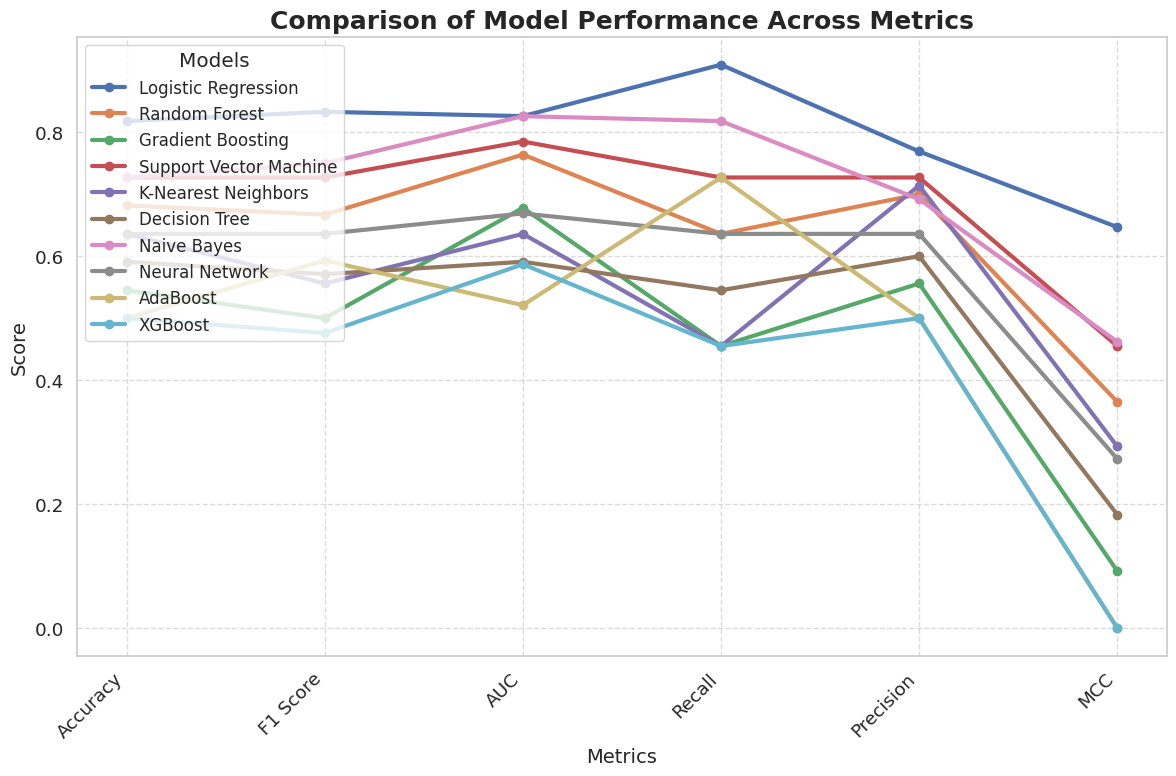

In [ ]:
# It seems I forgot to import the necessary libraries again. Let's fix that and run the complete code.
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data setup
data = {
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Support Vector Machine',
              'K-Nearest Neighbors', 'Decision Tree', 'Naive Bayes', 'Neural Network', 'AdaBoost', 'XGBoost'],
    'Accuracy': [0.818, 0.682, 0.545, 0.727, 0.636, 0.591, 0.727, 0.636, 0.500, 0.500],
    'F1 Score': [0.833, 0.667, 0.500, 0.727, 0.556, 0.571, 0.750, 0.636, 0.593, 0.476],
    'AUC': [0.826, 0.764, 0.678, 0.785, 0.636, 0.591, 0.826, 0.669, 0.521, 0.587],
    'Recall': [0.909, 0.636, 0.455, 0.727, 0.455, 0.545, 0.818, 0.636, 0.727, 0.455],
    'Precision': [0.769, 0.700, 0.556, 0.727, 0.714, 0.600, 0.692, 0.636, 0.500, 0.500],
    'MCC': [0.647, 0.365, 0.092, 0.455, 0.293, 0.183, 0.462, 0.273, 0.000, 0.000]
}

# Creating the DataFrame
results_df = pd.DataFrame(data)

# Transposing the DataFrame for better plotting (methods on columns, metrics on rows)
results_df_t = results_df.set_index('Model').T

# Set up the figure and aesthetics
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid", palette="deep", font_scale=1.2)

# Plot each model's performance across metrics
for col in results_df_t.columns:
    plt.plot(results_df_t.index, results_df_t[col], marker='o', linewidth=3, label=col)

# Add a title and axis labels
plt.title('Comparison of Model Performance Across Metrics', fontsize=18, weight='bold')
plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Score', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Customize the grid and legend for high impact
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title="Models", loc='upper left', fontsize=12)

# Tight layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Data setup
data = {
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Support Vector Machine',
              'K-Nearest Neighbors', 'Decision Tree', 'Naive Bayes', 'Neural Network', 'AdaBoost', 'XGBoost'],
    'Accuracy': [0.818, 0.682, 0.545, 0.727, 0.636, 0.591, 0.727, 0.636, 0.500, 0.500],
    'F1 Score': [0.833, 0.667, 0.500, 0.727, 0.556, 0.571, 0.750, 0.636, 0.593, 0.476],
    'AUC': [0.826, 0.764, 0.678, 0.785, 0.636, 0.591, 0.826, 0.669, 0.521, 0.587],
    'Recall': [0.909, 0.636, 0.455, 0.727, 0.455, 0.545, 0.818, 0.636, 0.727, 0.455],
    'Precision': [0.769, 0.700, 0.556, 0.727, 0.714, 0.600, 0.692, 0.636, 0.500, 0.500],
    # 'MCC': [0.647, 0.365, 0.092, 0.455, 0.293, 0.183, 0.462, 0.273, 0.000, 0.000]
}

# Create DataFrame
results_df = pd.DataFrame(data)

# Transpose the DataFrame for Plotly plotting
results_df_t = results_df.set_index('Model').T

# Create the figure
fig = go.Figure()

# Add traces for each model
for col in results_df_t.columns:
    fig.add_trace(go.Scatter(
        x=results_df_t.index,
        y=results_df_t[col],
        mode='lines+markers',
        name=col,
        text=col,
        hoverinfo='text+y',
        line=dict(width=2)
    ))

# Update layout for aesthetics
fig.update_layout(
    title='Comparison of Model Performance Across Metrics',
    xaxis_title='Metrics',
    yaxis_title='Score',
    xaxis_tickangle=-45,
    legend_title='Models',
    template='plotly_white',
    hovermode='x unified'
)

# Show the figure
fig.show()


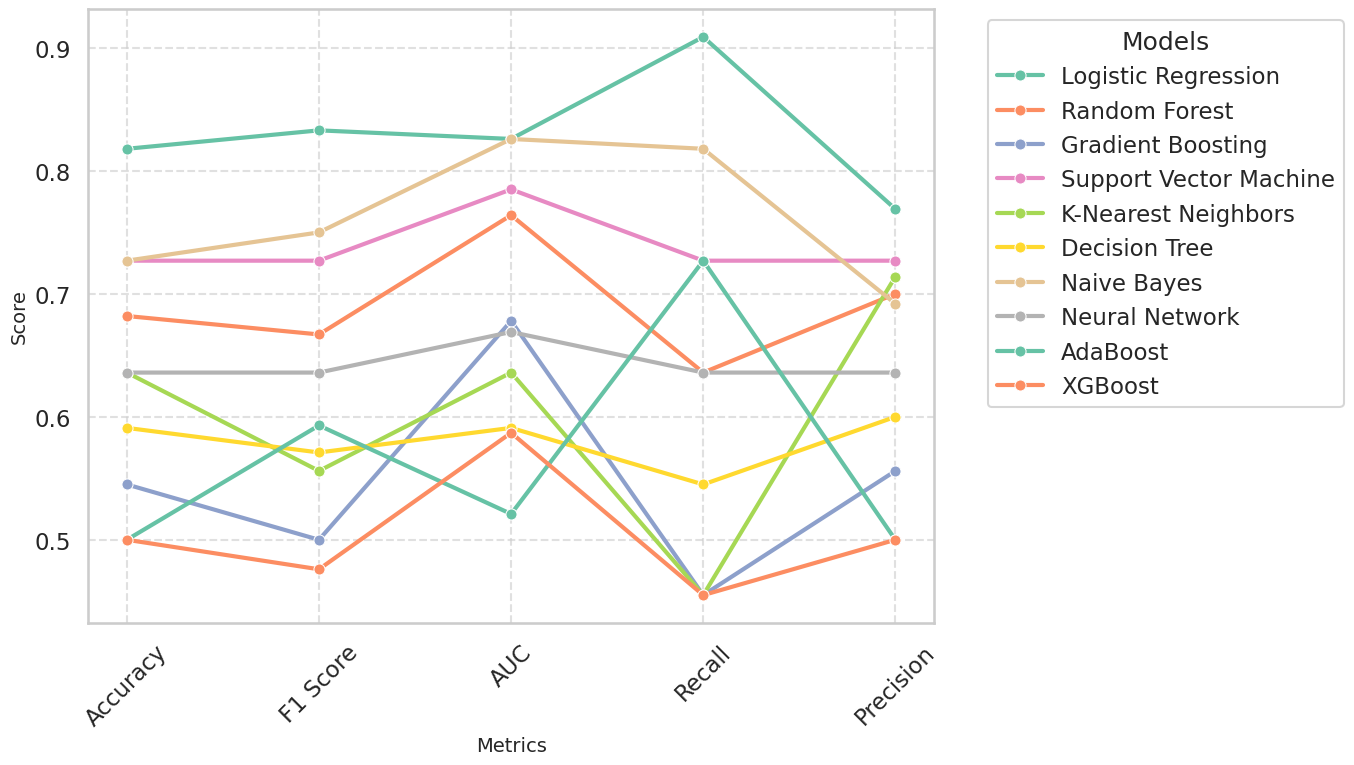

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Data setup
data = {
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Support Vector Machine',
              'K-Nearest Neighbors', 'Decision Tree', 'Naive Bayes', 'Neural Network', 'AdaBoost', 'XGBoost'],
    'Accuracy': [0.818, 0.682, 0.545, 0.727, 0.636, 0.591, 0.727, 0.636, 0.500, 0.500],
    'F1 Score': [0.833, 0.667, 0.500, 0.727, 0.556, 0.571, 0.750, 0.636, 0.593, 0.476],
    'AUC': [0.826, 0.764, 0.678, 0.785, 0.636, 0.591, 0.826, 0.669, 0.521, 0.587],
    'Recall': [0.909, 0.636, 0.455, 0.727, 0.455, 0.545, 0.818, 0.636, 0.727, 0.455],
    'Precision': [0.769, 0.700, 0.556, 0.727, 0.714, 0.600, 0.692, 0.636, 0.500, 0.500],
    # 'MCC': [0.647, 0.365, 0.092, 0.455, 0.293, 0.183, 0.462, 0.273, 0.000, 0.000]
}

# Create DataFrame
results_df = pd.DataFrame(data)

# Transform the data into long format for easier plotting
results_long = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Set up the figure size and aesthetics
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid", context="talk")

# Plot a lineplot using Seaborn
sns.lineplot(data=results_long, x="Metric", y="Score", hue="Model", marker='o', linewidth=3, markersize=8, palette="Set2")

# Add title and labels
#plt.title("Comparison of Model Performance Across Metrics", fontsize=20, weight='bold')
plt.xlabel("Metrics", fontsize=14)
plt.ylabel("Score", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Customize the legend for better placement
plt.legend(title="Models", bbox_to_anchor=(1.05, 1), loc='upper left')

# Enhance the grid for publication style
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()


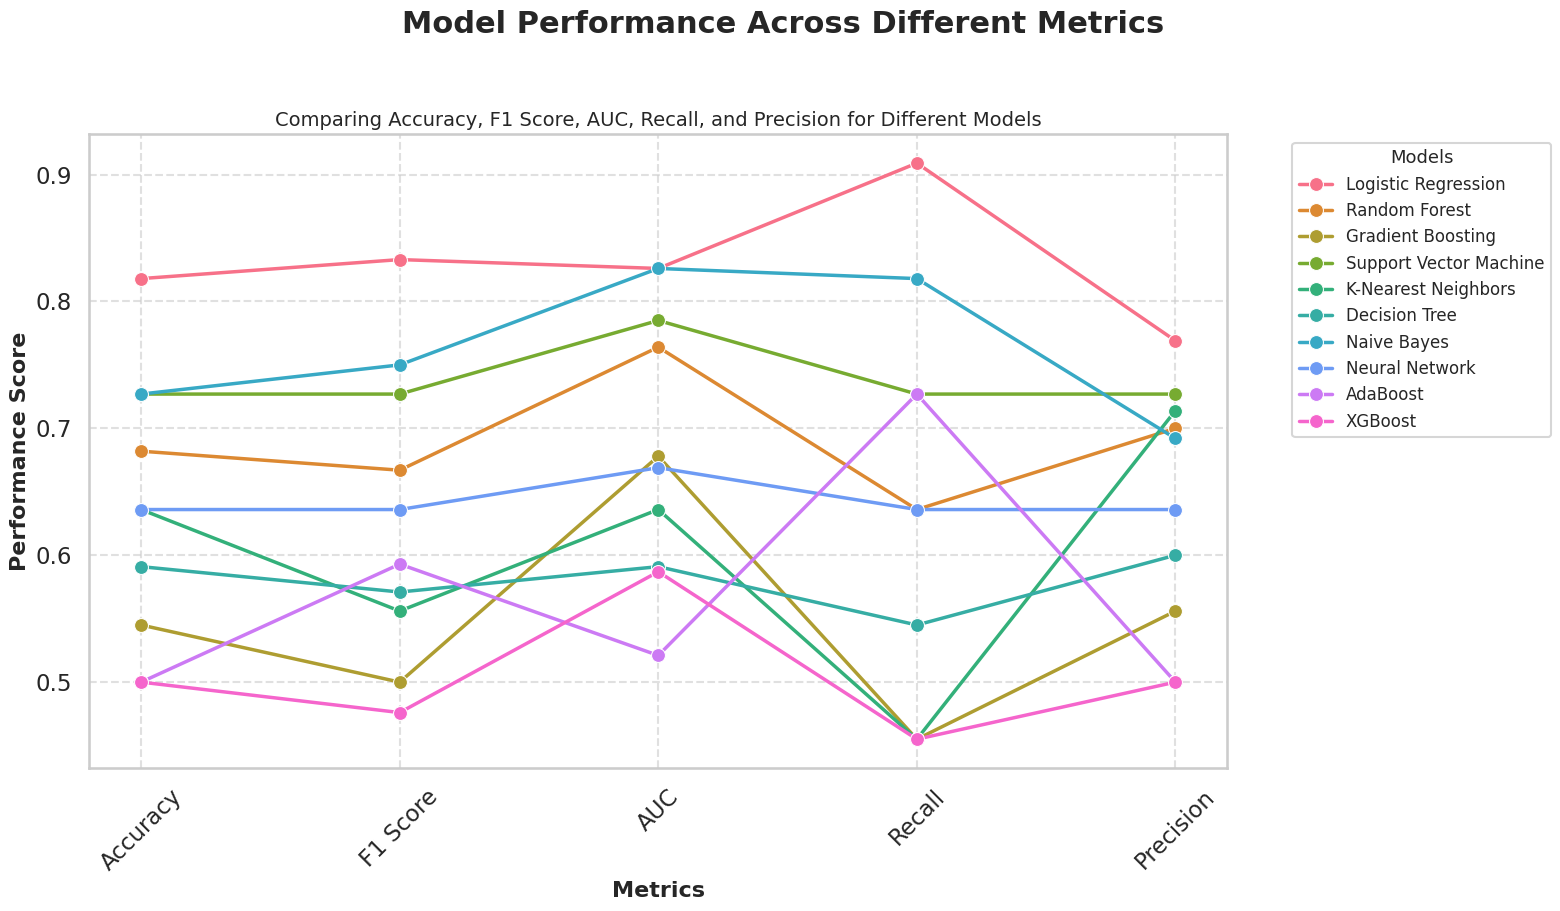

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Data setup
data = {
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Support Vector Machine',
              'K-Nearest Neighbors', 'Decision Tree', 'Naive Bayes', 'Neural Network', 'AdaBoost', 'XGBoost'],
    'Accuracy': [0.818, 0.682, 0.545, 0.727, 0.636, 0.591, 0.727, 0.636, 0.500, 0.500],
    'F1 Score': [0.833, 0.667, 0.500, 0.727, 0.556, 0.571, 0.750, 0.636, 0.593, 0.476],
    'AUC': [0.826, 0.764, 0.678, 0.785, 0.636, 0.591, 0.826, 0.669, 0.521, 0.587],
    'Recall': [0.909, 0.636, 0.455, 0.727, 0.455, 0.545, 0.818, 0.636, 0.727, 0.455],
    'Precision': [0.769, 0.700, 0.556, 0.727, 0.714, 0.600, 0.692, 0.636, 0.500, 0.500]
}

# Create DataFrame
results_df = pd.DataFrame(data)

# Transform the data into long format for easier plotting
results_long = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Set up the figure size and aesthetics
plt.figure(figsize=(16, 9))  # Larger size for a more professional look
sns.set(style="whitegrid", context="talk")

# Custom color palette for sharper differentiation
palette = sns.color_palette("husl", len(results_df))

# Plot a lineplot using Seaborn with customized markers and line styles
sns.lineplot(data=results_long, x="Metric", y="Score", hue="Model",
             marker='o', linewidth=2.5, markersize=10, palette=palette)

# Add title and subtitle
plt.suptitle("Model Performance Across Different Metrics", fontsize=22, weight='bold', y=1.02)
plt.title("Comparing Accuracy, F1 Score, AUC, Recall, and Precision for Different Models", fontsize=14)

# Labels for axes
plt.xlabel("Metrics", fontsize=16, weight='bold')
plt.ylabel("Performance Score", fontsize=16, weight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Customize the legend for better placement and readability
plt.legend(title="Models", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize='13')

# Enhance the grid for publication style
plt.grid(True, linestyle='--', alpha=0.6)

# Add padding to the axis for better spacing
plt.margins(x=0.05, y=0.05)

# Improve the layout for readability and spacing
plt.tight_layout()

# Show the plot
plt.show()


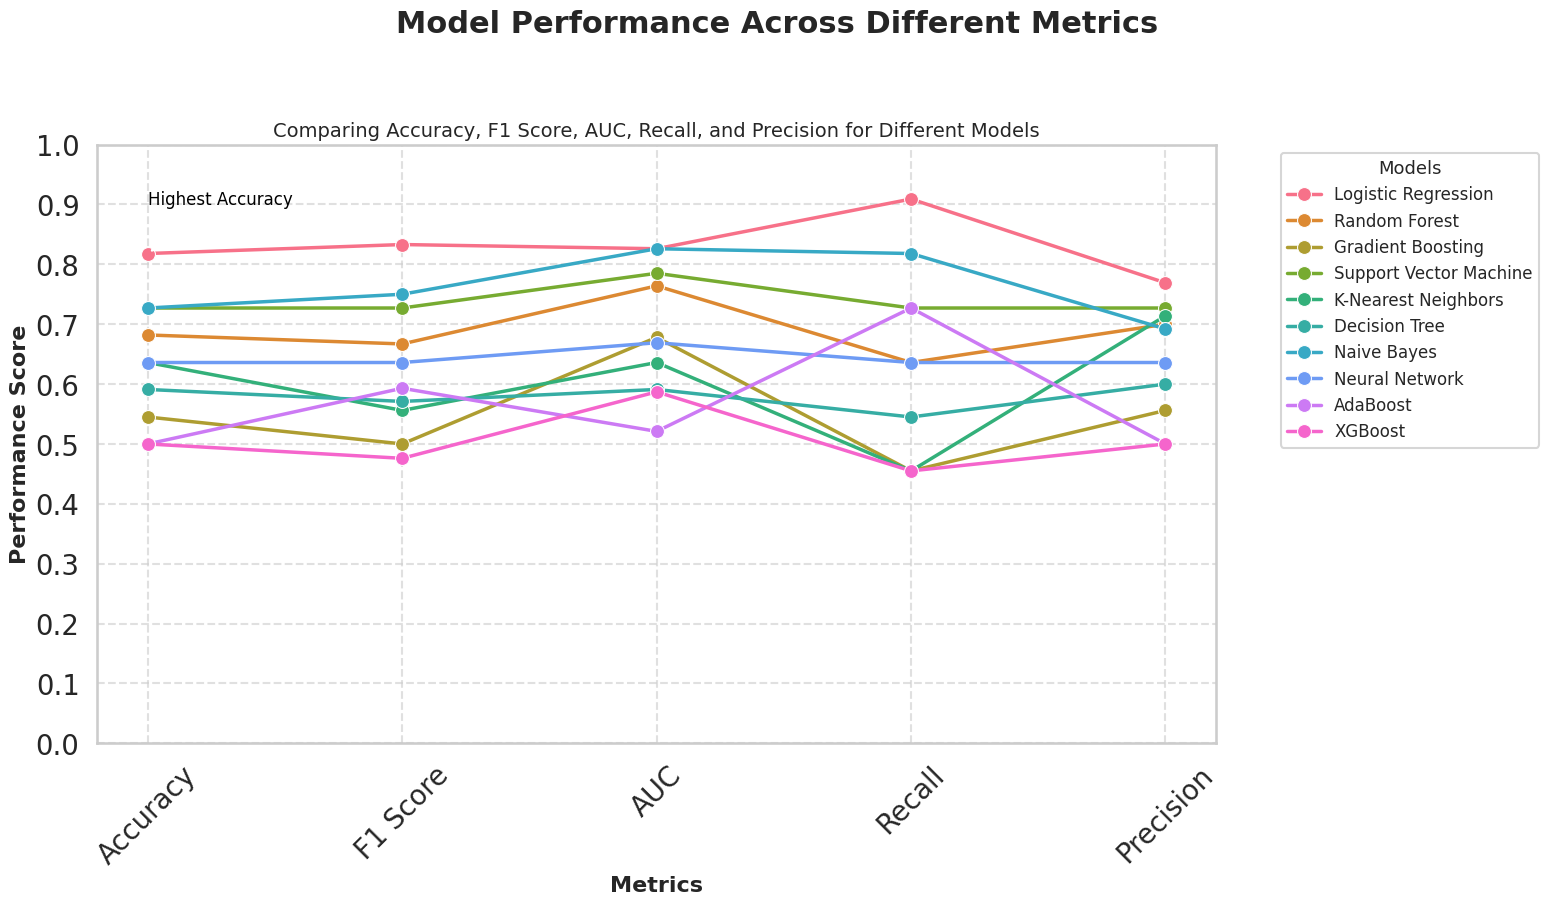

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker

# Data setup
data = {
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Support Vector Machine',
              'K-Nearest Neighbors', 'Decision Tree', 'Naive Bayes', 'Neural Network', 'AdaBoost', 'XGBoost'],
    'Accuracy': [0.818, 0.682, 0.545, 0.727, 0.636, 0.591, 0.727, 0.636, 0.500, 0.500],
    'F1 Score': [0.833, 0.667, 0.500, 0.727, 0.556, 0.571, 0.750, 0.636, 0.593, 0.476],
    'AUC': [0.826, 0.764, 0.678, 0.785, 0.636, 0.591, 0.826, 0.669, 0.521, 0.587],
    'Recall': [0.909, 0.636, 0.455, 0.727, 0.455, 0.545, 0.818, 0.636, 0.727, 0.455],
    'Precision': [0.769, 0.700, 0.556, 0.727, 0.714, 0.600, 0.692, 0.636, 0.500, 0.500]
}

# Create DataFrame
results_df = pd.DataFrame(data)

# Transform the data into long format for easier plotting
results_long = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Set up the figure size and aesthetics
plt.figure(figsize=(16, 9))
sns.set(style="whitegrid", context="talk", font_scale=1.2)

# Custom color palette
palette = sns.color_palette("husl", len(results_df))

# Plot the lineplot using Seaborn with enhanced markers, styles, and palette
sns.lineplot(data=results_long, x="Metric", y="Score", hue="Model",
             marker='o', linewidth=2.5, markersize=10, palette=palette)

# Add title and subtitle
plt.suptitle("Model Performance Across Different Metrics", fontsize=22, weight='bold', y=1.02)
plt.title("Comparing Accuracy, F1 Score, AUC, Recall, and Precision for Different Models", fontsize=14)

# Labels for axes
plt.xlabel("Metrics", fontsize=16, weight='bold')
plt.ylabel("Performance Score", fontsize=16, weight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set consistent y-axis limits and major ticks
plt.ylim(0, 1)
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.1))

# Customize the legend for better placement and readability
plt.legend(title="Models", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize='13')

# Add annotations for specific points (optional: e.g., highest Accuracy or AUC)
plt.annotate('Highest Accuracy', xy=('Accuracy', 0.818), xytext=(0, 0.9),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12, color='black')

# Enhance the grid for publication style
plt.grid(True, linestyle='--', alpha=0.6)

# Add padding to the axis for better spacing
plt.margins(x=0.05, y=0.05)

# Save the figure as a high-resolution TIFF image for publication
plt.tight_layout()
plt.savefig("model_performance.tiff", format='tiff', dpi=600)  # Save as high-resolution TIFF file
plt.show()


AttributeError: module 'matplotlib.patheffects' has no attribute 'withSimpleShadow'

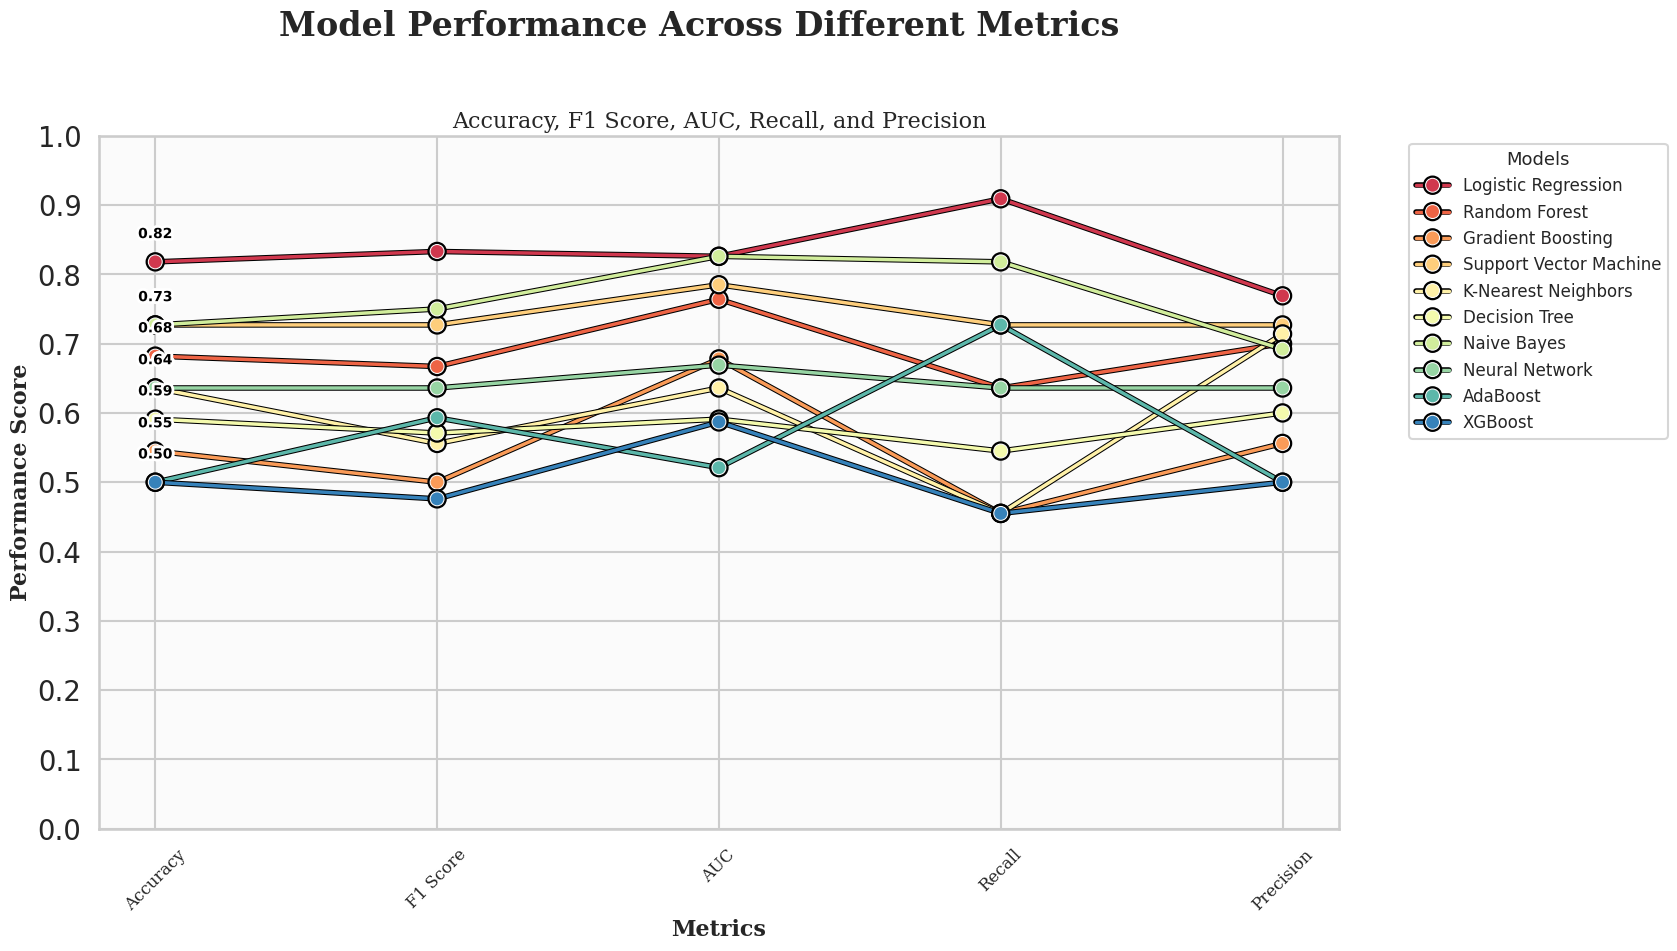

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.patheffects as pe

# Data setup
data = {
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Support Vector Machine',
              'K-Nearest Neighbors', 'Decision Tree', 'Naive Bayes', 'Neural Network', 'AdaBoost', 'XGBoost'],
    'Accuracy': [0.818, 0.682, 0.545, 0.727, 0.636, 0.591, 0.727, 0.636, 0.500, 0.500],
    'F1 Score': [0.833, 0.667, 0.500, 0.727, 0.556, 0.571, 0.750, 0.636, 0.593, 0.476],
    'AUC': [0.826, 0.764, 0.678, 0.785, 0.636, 0.591, 0.826, 0.669, 0.521, 0.587],
    'Recall': [0.909, 0.636, 0.455, 0.727, 0.455, 0.545, 0.818, 0.636, 0.727, 0.455],
    'Precision': [0.769, 0.700, 0.556, 0.727, 0.714, 0.600, 0.692, 0.636, 0.500, 0.500]
}

# Create DataFrame
results_df = pd.DataFrame(data)

# Transform the data into long format for easier plotting
results_long = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Set up the figure size and aesthetics
plt.figure(figsize=(16, 9))
sns.set(style="whitegrid", context="talk", font_scale=1.2)

# Custom color palette
palette = sns.color_palette("Spectral", len(results_df))  # Stunning gradient palette

# Plot the lineplot using Seaborn with enhanced markers, styles, and palette
sns.lineplot(data=results_long, x="Metric", y="Score", hue="Model",
             marker='o', linewidth=2.5, markersize=10, palette=palette,
             path_effects=[pe.withStroke(linewidth=4, foreground="black")])  # Glow effect on lines

# Add title and subtitle with custom font
plt.suptitle("Model Performance Across Different Metrics", fontsize=24, weight='bold', family='serif', y=1.02)
plt.title("Accuracy, F1 Score, AUC, Recall, and Precision", fontsize=16, family='serif')

# Labels for axes with custom font
plt.xlabel("Metrics", fontsize=16, weight='bold', family='serif')
plt.ylabel("Performance Score", fontsize=16, weight='bold', family='serif')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12, family='serif')

# Set consistent y-axis limits and major ticks
plt.ylim(0, 1)
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.1))

# Customize the legend for better placement and readability
plt.legend(title="Models", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize='13', frameon=True)

# Add annotations for specific points, but with dynamic placement to avoid overlap
for i, row in results_long.iterrows():
    if row['Metric'] == 'Accuracy':  # Example, only on Accuracy
        plt.text(row['Metric'], row['Score'] + 0.03, f'{row["Score"]:.2f}',
                 ha='center', va='bottom', fontsize=10, weight='bold', color='black',
                 path_effects=[pe.withStroke(linewidth=4, foreground="white")])  # White outline on text

# Subtle gradient background for emphasis
plt.gca().patch.set_facecolor('#f2f2f2')  # Light grey background
plt.gca().patch.set_alpha(0.3)  # Slight transparency for added emphasis

# Apply a subtle drop-shadow effect to markers (creating a 3D effect)
for line in plt.gca().lines:
    line.set_path_effects([pe.withSimpleShadow(), pe.Normal()])

# Save the figure as a high-resolution TIFF image for publication
plt.tight_layout()
plt.savefig("stunning_model_performance.tiff", format='tiff', dpi=600)  # Save as high-resolution TIFF file
plt.show()


AttributeError: module 'matplotlib.patheffects' has no attribute 'withSimpleShadow'

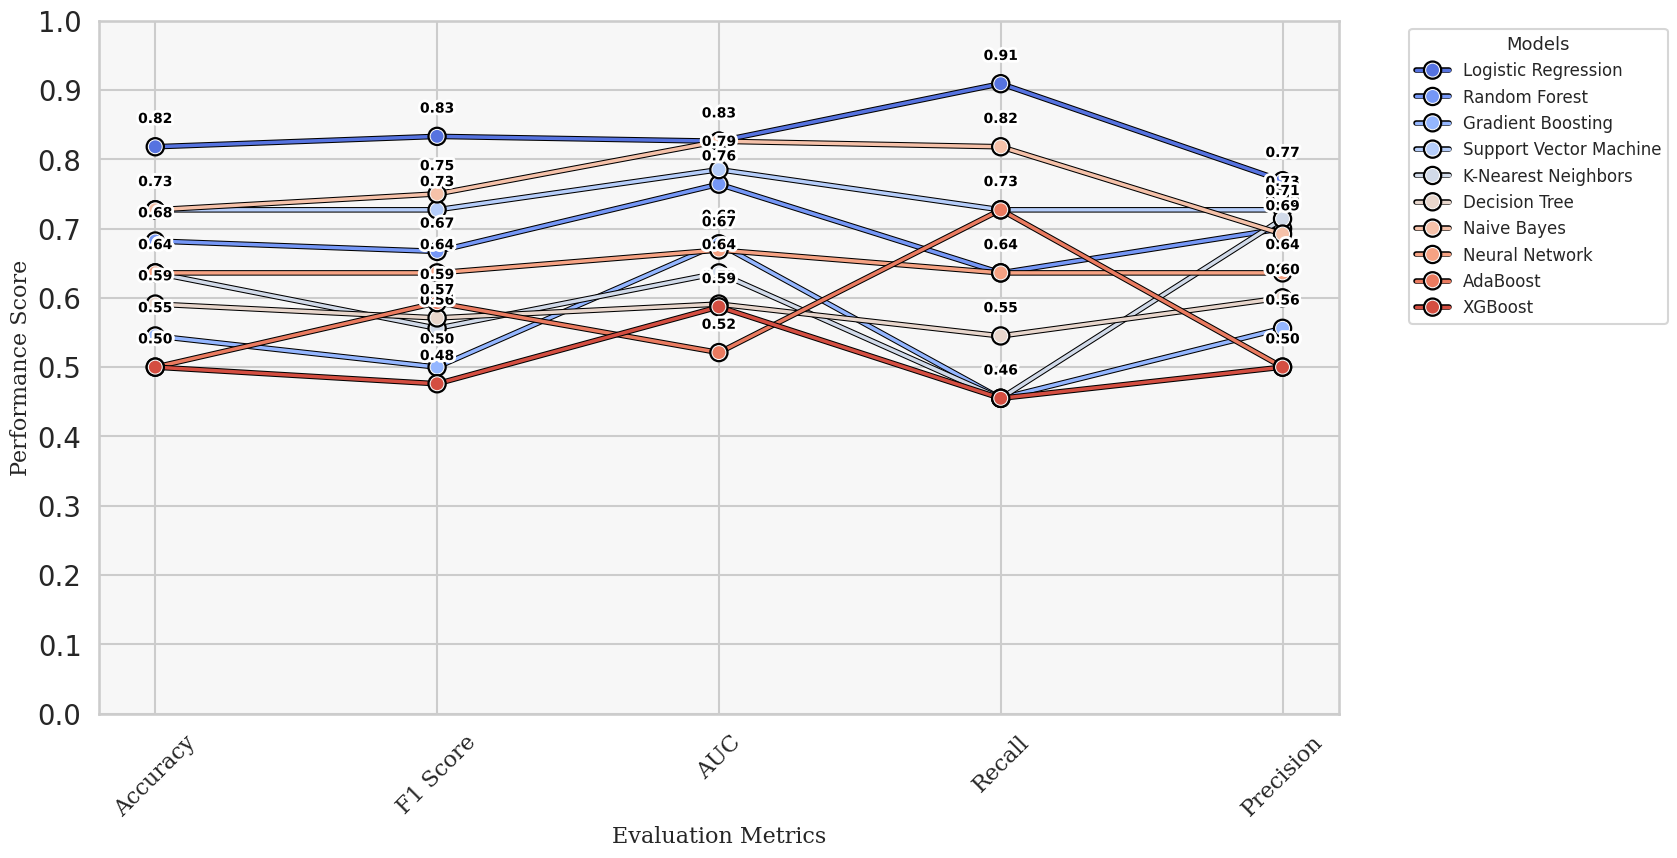

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.patheffects as pe

# Data setup
data = {
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Support Vector Machine',
              'K-Nearest Neighbors', 'Decision Tree', 'Naive Bayes', 'Neural Network', 'AdaBoost', 'XGBoost'],
    'Accuracy': [0.818, 0.682, 0.545, 0.727, 0.636, 0.591, 0.727, 0.636, 0.500, 0.500],
    'F1 Score': [0.833, 0.667, 0.500, 0.727, 0.556, 0.571, 0.750, 0.636, 0.593, 0.476],
    'AUC': [0.826, 0.764, 0.678, 0.785, 0.636, 0.591, 0.826, 0.669, 0.521, 0.587],
    'Recall': [0.909, 0.636, 0.455, 0.727, 0.455, 0.545, 0.818, 0.636, 0.727, 0.455],
    'Precision': [0.769, 0.700, 0.556, 0.727, 0.714, 0.600, 0.692, 0.636, 0.500, 0.500]
}

# Create DataFrame
results_df = pd.DataFrame(data)

# Transform the data into long format for easier plotting
results_long = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Set up the figure size and aesthetics
plt.figure(figsize=(16, 9))
sns.set(style="whitegrid", context="talk", font_scale=1.2)

# Custom color palette with stunning gradient
palette = sns.color_palette("coolwarm", len(results_df))  # Enhanced color gradient

# Plot the lineplot using Seaborn with enhanced markers, styles, and palette
sns.lineplot(data=results_long, x="Metric", y="Score", hue="Model",
             marker='o', linewidth=2.5, markersize=10, palette=palette,
             path_effects=[pe.withStroke(linewidth=4, foreground="black")])  # Glow effect on lines

# Add title and subtitle with custom font
#plt.suptitle("Comparative Model Performance Across Metrics", fontsize=22, weight='bold', family='serif', y=1.02)
#plt.title("Evaluation on Accuracy, F1 Score, AUC, Recall, and Precision", fontsize=14, family='serif')

# Labels for axes with professional styling
plt.xlabel("Evaluation Metrics", fontsize=16, family='serif')
plt.ylabel("Performance Score", fontsize=16, family='serif')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=16, family='serif')

# Set consistent y-axis limits and major ticks
plt.ylim(0, 1)
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.1))

# Customize the legend for better placement and readability
plt.legend(title="Models", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize='13', frameon=True)

# Add annotations for all metrics (not just Accuracy), dynamically placed to avoid overlap
for i, row in results_long.iterrows():
    plt.text(row['Metric'], row['Score'] + 0.03, f'{row["Score"]:.2f}',
             ha='center', va='bottom', fontsize=10, weight='bold', color='black',
             path_effects=[pe.withStroke(linewidth=4, foreground="white")])

# Set a more artistic gradient background for emphasis
plt.gca().patch.set_facecolor('#f5f5f5')  # Very light grey background
plt.gca().patch.set_alpha(0.7)  # Slight transparency for added emphasis

# Apply a subtle drop-shadow effect to markers (creating a 3D effect)
for line in plt.gca().lines:
    line.set_path_effects([pe.withSimpleShadow(), pe.Normal()])

# Save the figure as a high-resolution TIFF image for publication
plt.tight_layout()
plt.savefig("stunning_full_labels_performance.tiff", format='tiff', dpi=600)  # Save as high-resolution TIFF file
plt.show()


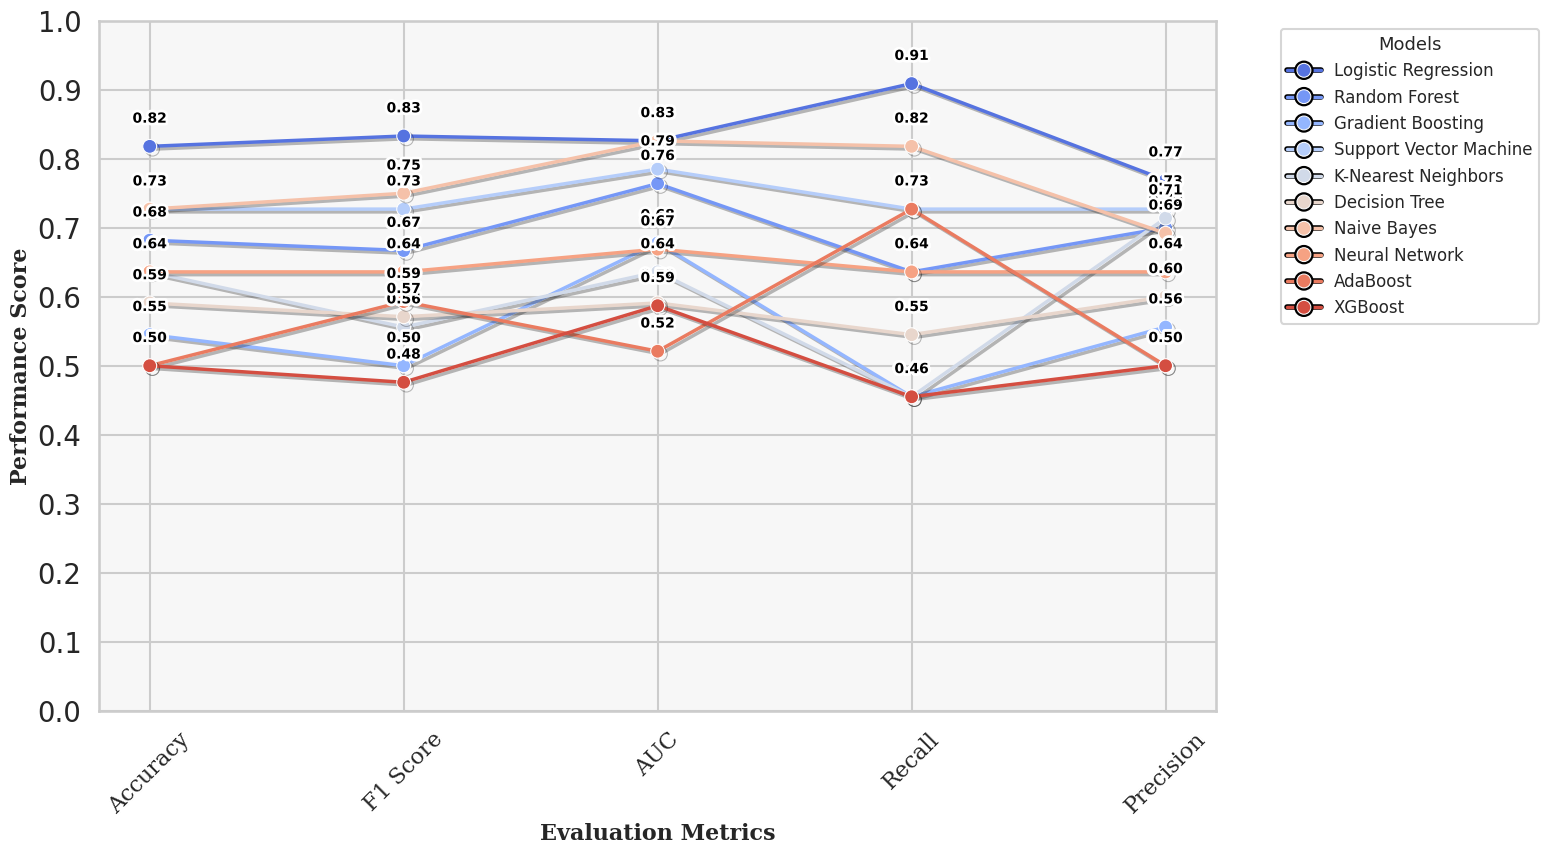

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.patheffects as pe

# Data setup
data = {
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Support Vector Machine',
              'K-Nearest Neighbors', 'Decision Tree', 'Naive Bayes', 'Neural Network', 'AdaBoost', 'XGBoost'],
    'Accuracy': [0.818, 0.682, 0.545, 0.727, 0.636, 0.591, 0.727, 0.636, 0.500, 0.500],
    'F1 Score': [0.833, 0.667, 0.500, 0.727, 0.556, 0.571, 0.750, 0.636, 0.593, 0.476],
    'AUC': [0.826, 0.764, 0.678, 0.785, 0.636, 0.591, 0.826, 0.669, 0.521, 0.587],
    'Recall': [0.909, 0.636, 0.455, 0.727, 0.455, 0.545, 0.818, 0.636, 0.727, 0.455],
    'Precision': [0.769, 0.700, 0.556, 0.727, 0.714, 0.600, 0.692, 0.636, 0.500, 0.500]
}

# Create DataFrame
results_df = pd.DataFrame(data)

# Transform the data into long format for easier plotting
results_long = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Set up the figure size and aesthetics
plt.figure(figsize=(16, 9))
sns.set(style="whitegrid", context="talk", font_scale=1.2)

# Custom color palette with stunning gradient
palette = sns.color_palette("coolwarm", len(results_df))  # Enhanced color gradient

# Plot the lineplot using Seaborn with enhanced markers, styles, and palette
sns.lineplot(data=results_long, x="Metric", y="Score", hue="Model",
             marker='o', linewidth=2.5, markersize=10, palette=palette,
             path_effects=[pe.withStroke(linewidth=4, foreground="black")])  # Glow effect on lines

# Add title and subtitle with custom font
#plt.suptitle("Comparative Model Performance Across Metrics", fontsize=22, weight='bold', family='serif', y=1.02)
#plt.title("Evaluation on Accuracy, F1 Score, AUC, Recall, and Precision", fontsize=14, family='serif')

# Labels for axes with professional styling
plt.xlabel("Evaluation Metrics", fontsize=16, weight='bold', family='serif')
plt.ylabel("Performance Score", fontsize=16, weight='bold', family='serif')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=16, family='serif')

# Set consistent y-axis limits and major ticks
plt.ylim(0, 1)
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.1))

# Customize the legend for better placement and readability
plt.legend(title="Models", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize='13', frameon=True)

# Add annotations for all metrics (not just Accuracy), dynamically placed to avoid overlap
for i, row in results_long.iterrows():
    plt.text(row['Metric'], row['Score'] + 0.03, f'{row["Score"]:.2f}',
             ha='center', va='bottom', fontsize=10, weight='bold', color='black',
             path_effects=[pe.withStroke(linewidth=4, foreground="white")])

# Set a more artistic gradient background for emphasis
plt.gca().patch.set_facecolor('#f5f5f5')  # Very light grey background
plt.gca().patch.set_alpha(0.7)  # Slight transparency for added emphasis

# Apply a shadow effect using available SimpleLineShadow for 3D effect
for line in plt.gca().lines:
    line.set_path_effects([pe.SimpleLineShadow(), pe.Normal()])

# Save the figure as a high-resolution TIFF image for publication
plt.tight_layout()
plt.savefig("stunning_full_labels_performance_v2.tiff", format='tiff', dpi=600)  # Save as high-resolution TIFF file
plt.show()


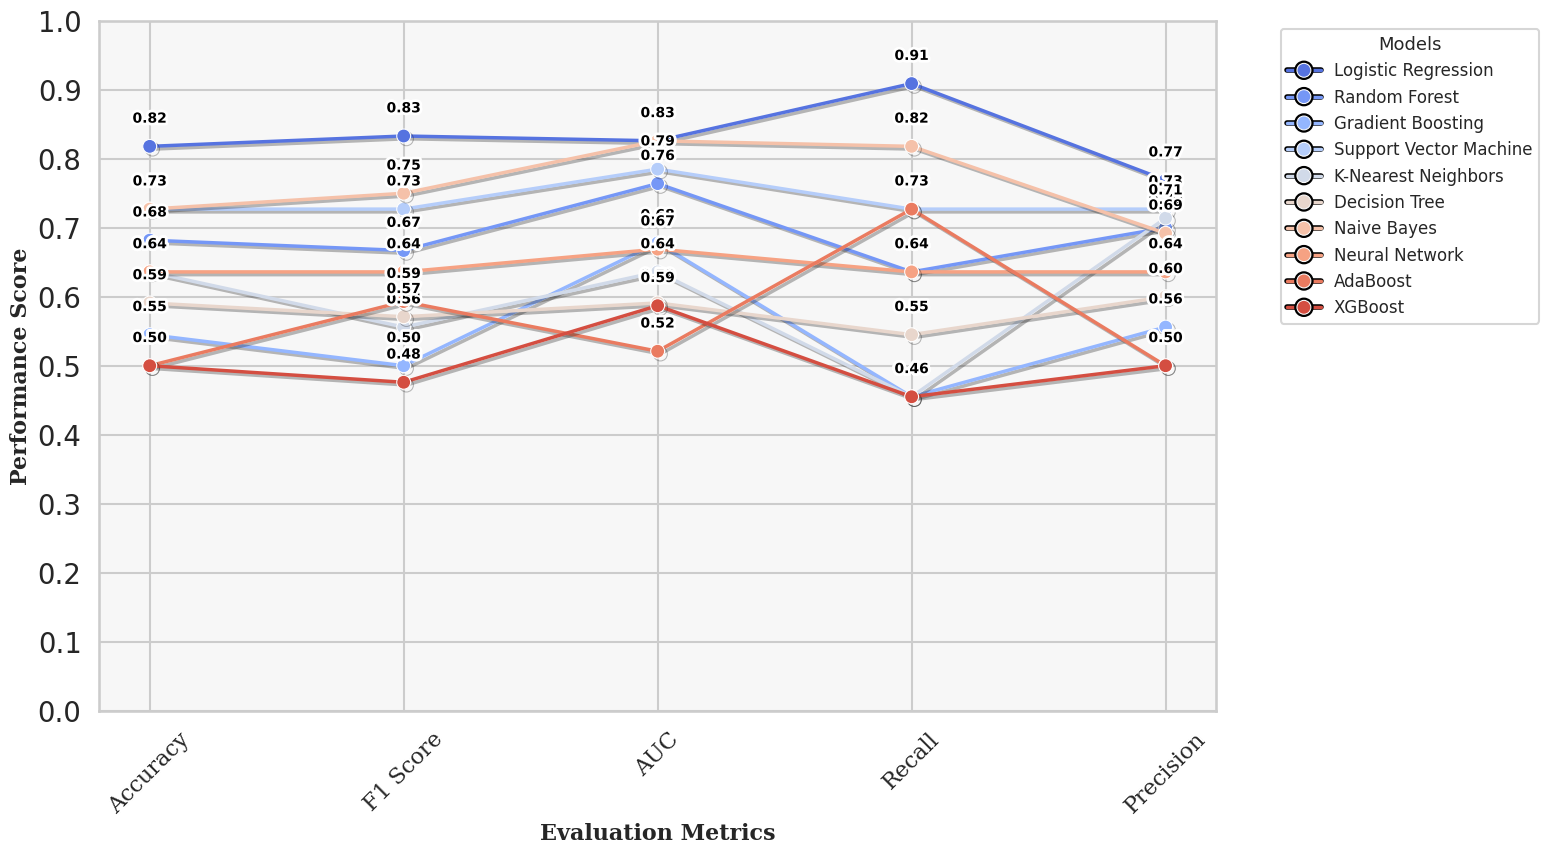

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.patheffects as pe

# Data setup
data = {
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Support Vector Machine',
              'K-Nearest Neighbors', 'Decision Tree', 'Naive Bayes', 'Neural Network', 'AdaBoost', 'XGBoost'],
    'Accuracy': [0.818, 0.682, 0.545, 0.727, 0.636, 0.591, 0.727, 0.636, 0.500, 0.500],
    'F1 Score': [0.833, 0.667, 0.500, 0.727, 0.556, 0.571, 0.750, 0.636, 0.593, 0.476],
    'AUC': [0.826, 0.764, 0.678, 0.785, 0.636, 0.591, 0.826, 0.669, 0.521, 0.587],
    'Recall': [0.909, 0.636, 0.455, 0.727, 0.455, 0.545, 0.818, 0.636, 0.727, 0.455],
    'Precision': [0.769, 0.700, 0.556, 0.727, 0.714, 0.600, 0.692, 0.636, 0.500, 0.500]
}

# Create DataFrame
results_df = pd.DataFrame(data)

# Transform the data into long format for easier plotting
results_long = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Set up the figure size and aesthetics
plt.figure(figsize=(16, 9))
sns.set(style="whitegrid", context="talk", font_scale=1.2)

# Custom color palette with stunning gradient
palette = sns.color_palette("coolwarm", len(results_df))  # Enhanced color gradient

# Plot the lineplot using Seaborn with enhanced markers, styles, and palette
sns.lineplot(data=results_long, x="Metric", y="Score", hue="Model",
             marker='o', linewidth=2.5, markersize=10, palette=palette,
             path_effects=[pe.withStroke(linewidth=4, foreground="black")])  # Glow effect on lines

# Add title and subtitle with custom font
#plt.suptitle("Comparative Model Performance Across Metrics", fontsize=22, weight='bold', family='serif', y=1.02)
#plt.title("Evaluation on Accuracy, F1 Score, AUC, Recall, and Precision", fontsize=14, family='serif')

# Labels for axes with professional styling
plt.xlabel("Evaluation Metrics", fontsize=16, weight='bold', family='serif')
plt.ylabel("Performance Score", fontsize=16, weight='bold', family='serif')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=16, family='serif')

# Set consistent y-axis limits and major ticks
plt.ylim(0, 1)
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.1))

# Customize the legend for better placement and readability
plt.legend(title="Models", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize='13', frameon=True)

# Add annotations for all metrics (not just Accuracy), dynamically placed to avoid overlap
for i, row in results_long.iterrows():
    plt.text(row['Metric'], row['Score'] + 0.03, f'{row["Score"]:.2f}',
             ha='center', va='bottom', fontsize=10, weight='bold', color='black',
             path_effects=[pe.withStroke(linewidth=4, foreground="white")])

# Set a more artistic gradient background for emphasis
plt.gca().patch.set_facecolor('#f5f5f5')  # Very light grey background
plt.gca().patch.set_alpha(0.7)  # Slight transparency for added emphasis

# Apply a shadow effect using available SimpleLineShadow for 3D effect
for line in plt.gca().lines:
    line.set_path_effects([pe.SimpleLineShadow(), pe.Normal()])

# Save the figure as a high-resolution TIFF image for publication
plt.tight_layout()
plt.savefig("stunning_full_labels_performance_v2.png", format='png', dpi=600)  # Save as high-resolution TIFF file
plt.show()

# **SHAP**

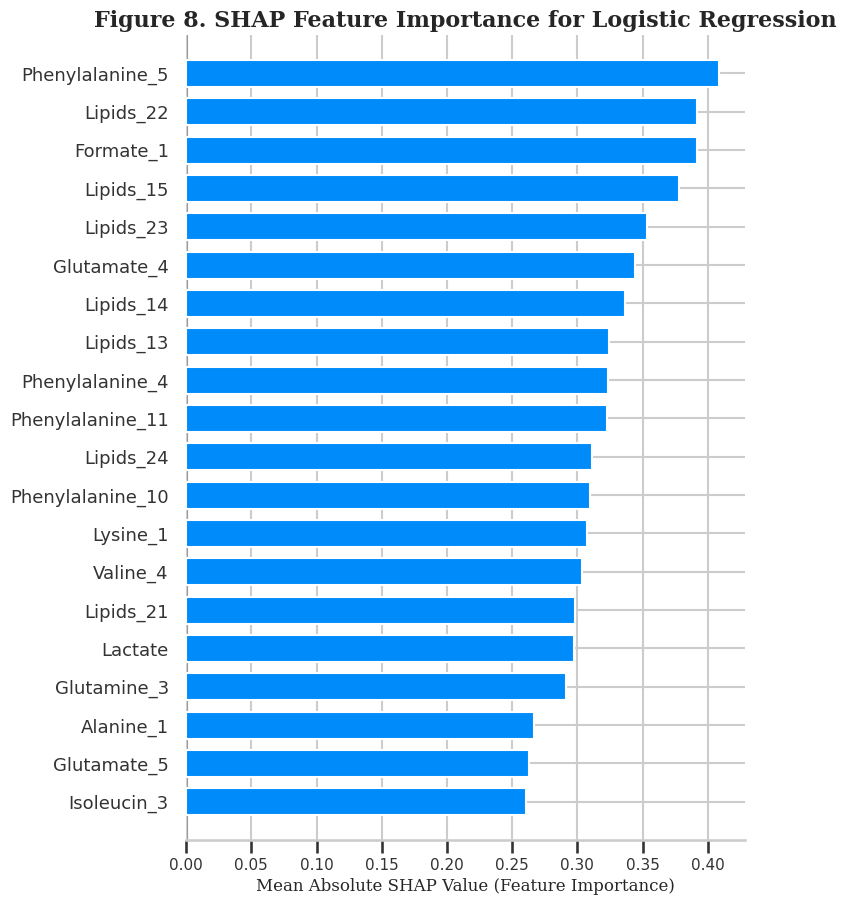

In [ ]:
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Initialize and fit the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Use SHAP to explain model predictions
explainer = shap.LinearExplainer(model, X_train)  # Logistic regression is linear
shap_values = explainer.shap_values(X_test)

# Plot the SHAP summary plot for feature importance
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)

# Customize the plot for publication-ready output
plt.title("Figure 8. SHAP Feature Importance for Logistic Regression", fontsize=16, weight='bold', family='serif')
plt.xlabel("Mean Absolute SHAP Value (Feature Importance)", fontsize=12, family='serif')
plt.tight_layout()

# Save the figure as a high-resolution TIFF
plt.savefig("shap_logistic_regression_feature_importance.tiff", format="tiff", dpi=600)

# Show the plot
plt.show()


In [ ]:
pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 19.5 MB/s eta 0:00:00


## **AutoGluon**




In [ ]:
pip install autogluon


ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 377, in run
    requirement_set = resolver.resolve(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 95, in resolve
    result = self._result = resolver.resolve(
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 546, in resolve
    state = resolution.resolve(requirements, max_rounds=max_rounds)
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 427, in resolve
    failure_causes = self._attempt_to_pin_criterion(name)

In [ ]:
X_train_selected = pd.read_csv('X_train_data.csv')
X_test_selected = pd.read_csv('X_test_data.csv')
y_train = pd.read_csv('y_train.csv').squeeze()
y_test = pd.read_csv('y_test.csv').squeeze()

In [ ]:
from autogluon.tabular import TabularPredictor
import pandas as pd

# Combine training data into a single DataFrame
train_data = pd.concat([X_train_selected, pd.Series(y_train, name='target')], axis=1)
test_data = pd.concat([X_test_selected, pd.Series(y_test, name='target')], axis=1)

# Define the label column
label = 'target'

# Initialize and train the AutoGluon predictor
predictor = TabularPredictor(label=label, eval_metric='f1').fit(
    train_data,
    presets='best_quality',
    time_limit=600
)

# Evaluate the model on the test data
performance = predictor.evaluate(test_data)

leaderboard = predictor.leaderboard(test_data, silent=True)

print("Performance metrics on the test set:")
print(performance)
print("\nLeaderboard of evaluated models:")
print(leaderboard)


ModuleNotFoundError: No module named 'autogluon'

In [ ]:
performance = predictor.evaluate(test_data)
print("Performance metrics on the test set:")
performance